In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# File paths
phenotypic_file = "Phenotypic_V1_0b_preprocessed1.csv"
anat_qap_file = "anat_qap.csv"
dti_qap_file = "dti_qap.csv"
functional_qap_file = "functional_qap.csv"

# Load datasets
phenotypic_df = pd.read_csv(phenotypic_file)
anat_qap_df = pd.read_csv(anat_qap_file)
dti_qap_df = pd.read_csv(dti_qap_file)
functional_qap_df = pd.read_csv(functional_qap_file)

# Standardize column names
anat_qap_df.rename(columns={"Sub_ID": "SUB_ID", "Site_ID": "SITE_ID", "Session": "SESSION"}, inplace=True)
dti_qap_df.rename(columns={"Sub_ID": "SUB_ID", "Site_ID": "SITE_ID", "Session": "SESSION"}, inplace=True)
functional_qap_df.rename(columns={"Sub_ID": "SUB_ID", "Site_ID": "SITE_ID", "Session": "SESSION"}, inplace=True)

# Check if 'SESSION' exists in phenotypic_df, if not, merge without it
merge_columns = ["SUB_ID", "SITE_ID"]
if "SESSION" in phenotypic_df.columns:
    merge_columns.append("SESSION")

# Merge datasets
merged_df = phenotypic_df.merge(anat_qap_df, on=merge_columns, how="left")
merged_df = merged_df.merge(dti_qap_df, on=merge_columns, how="left")
merged_df = merged_df.merge(functional_qap_df, on=merge_columns, how="left")

# Save the final merged dataset
output_file = "final_merged_dataset.csv"
merged_df.to_csv(output_file, index=False)

print(f"Final merged dataset saved with {merged_df.shape[0]} rows and {merged_df.shape[1]} columns.")


FileNotFoundError: [Errno 2] No such file or directory: 'Phenotypic_V1_0b_preprocessed1.csv'

In [ ]:
import pandas as pd

# Load the dataset
file_path = "final_merged_dataset.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns (Unnamed columns and redundant identifiers)
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col], errors='ignore')

# Handle missing values
threshold = 0.4  # Drop columns with more than 40% missing values
df = df.dropna(axis=1, thresh=int(threshold * len(df)))

# Fill remaining missing values (numerical: mean, categorical: mode)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical with mode
    else:
        df[col].fillna(df[col].mean(), inplace=True)  # Fill numerical with mean

# Convert categorical columns to numerical (One-Hot Encoding or Label Encoding)
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Save cleaned dataset
cleaned_file_path = "cleaned_final_dataset.csv"
df.to_csv(cleaned_file_path, index=False)

# Return cleaned dataset info
df.shape, cleaned_file_path


<ipython-input-3-e1c0f43810da>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)  # Fill numerical with mean
<ipython-input-3-e1c0f43810da>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

((1112, 1134), 'cleaned_final_dataset.csv')

In [ ]:
from google.colab import drive
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# File path (update if needed)
file_path = "/content/drive/MyDrive/OHSU_0050147_func_minimal.nii"

# Load the NIfTI file
img = nib.load(file_path)
data = img.get_fdata()

# Print the shape
print("NIfTI file shape:", data.shape)  # Expected (61, 73, 61, 78)

# Select the first time point (T=0)
volume_0 = data[:, :, :, 0]  # Shape becomes (61, 73, 61)

# Extract a middle slice from each axis
slice_x = volume_0[volume_0.shape[0] // 2, :, :]  # Sagittal (XZ plane)
slice_y = volume_0[:, volume_0.shape[1] // 2, :]  # Coronal (YZ plane)
slice_z = volume_0[:, :, volume_0.shape[2] // 2]  # Axial (XY plane)

# Plot the slices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(slice_x.T, cmap="gray", aspect="auto")
axes[0].set_title("Sagittal Slice (XZ)")

axes[1].imshow(slice_y.T, cmap="gray", aspect="auto")
axes[1].set_title("Coronal Slice (YZ)")

axes[2].imshow(slice_z.T, cmap="gray", aspect="auto")
axes[2].set_title("Axial Slice (XY)")

plt.show()


FileNotFoundError: No such file or no access: '/content/drive/MyDrive/OHSU_0050147_func_minimal.nii'

Dataset Info:
Original feature count: 1133
Reshaped to: 33x33
Training samples: 889
Test samples: 223

Training models...

=== Training VGG-19 ===
Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - accuracy: 0.4912 - loss: 0.7542 - val_accuracy: 0.5740 - val_loss: 0.6854
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.5104 - loss: 0.7002 - val_accuracy: 0.5740 - val_loss: 0.6864
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4786 - loss: 0.7242 - val_accuracy: 0.5740 - val_loss: 0.6844
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5045 - loss: 0.6961 - val_accuracy: 0.4260 - val_loss: 0.6976
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5130 - loss: 0.6965 - val_accuracy: 0.4260 - val_loss: 0.6963
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5104 - loss: 0.6932 - val_accuracy: 0.5740 - val_loss: 0.6891
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4952 - loss: 0.6984 - val

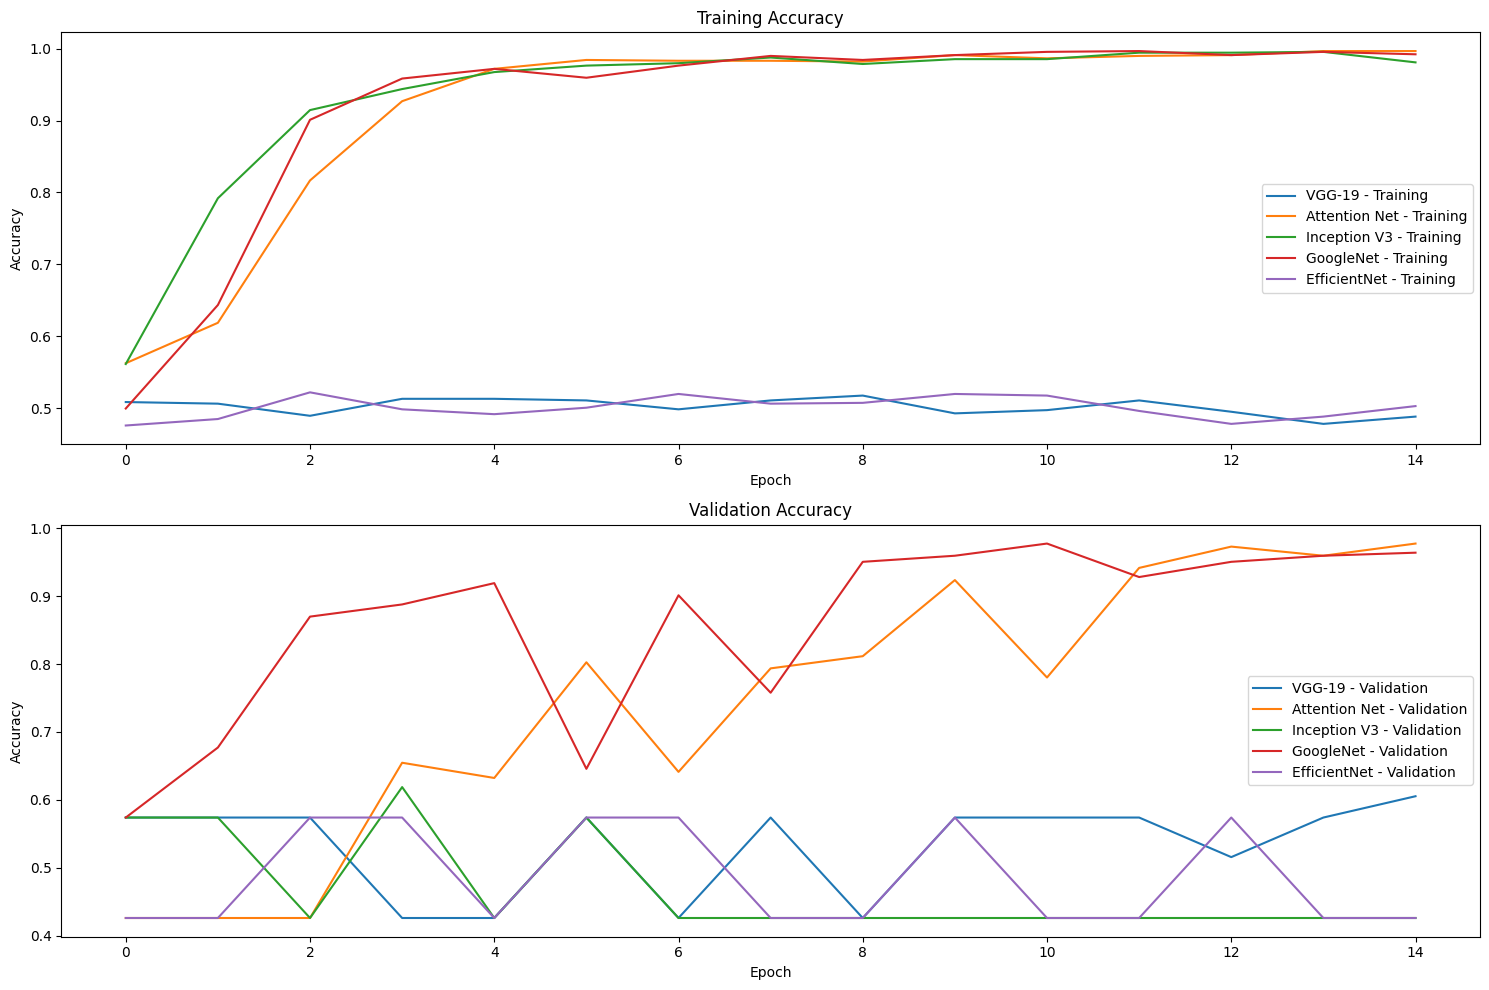

Dataset Info:
Original feature count: 1133
Reshaped to: 33x33
Training samples: 889
Test samples: 223

Training models...

=== Training VGG-19 ===
Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.4828 - loss: 0.7434 - val_accuracy: 0.5740 - val_loss: 0.6801
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5249 - loss: 0.7019 - val_accuracy: 0.5740 - val_loss: 0.6784
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5202 - loss: 0.7039 - val_accuracy: 0.5157 - val_loss: 0.6925
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5112 - loss: 0.7082 - val_accuracy: 0.5874 - val_loss: 0.6766
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5401 - loss: 0.6876 - val_accuracy: 0.5471 - val_loss: 0.6838
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5520 - loss: 0.6851 - val_accuracy: 0.5650 - val_loss: 0.6770
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5258 - loss: 0.6933 - val

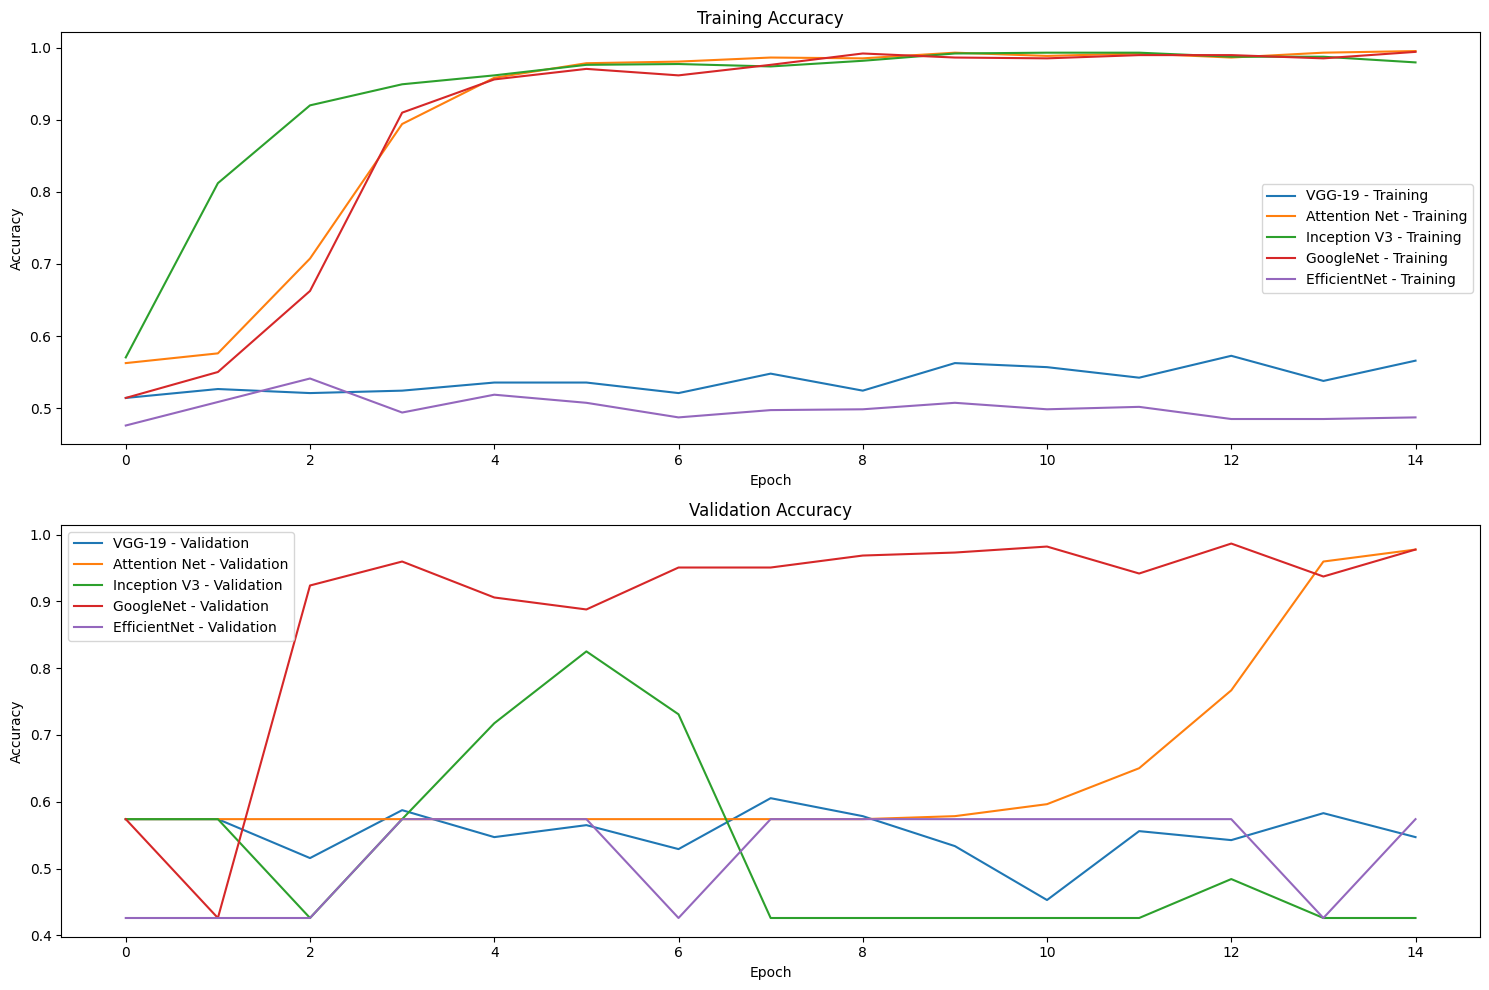

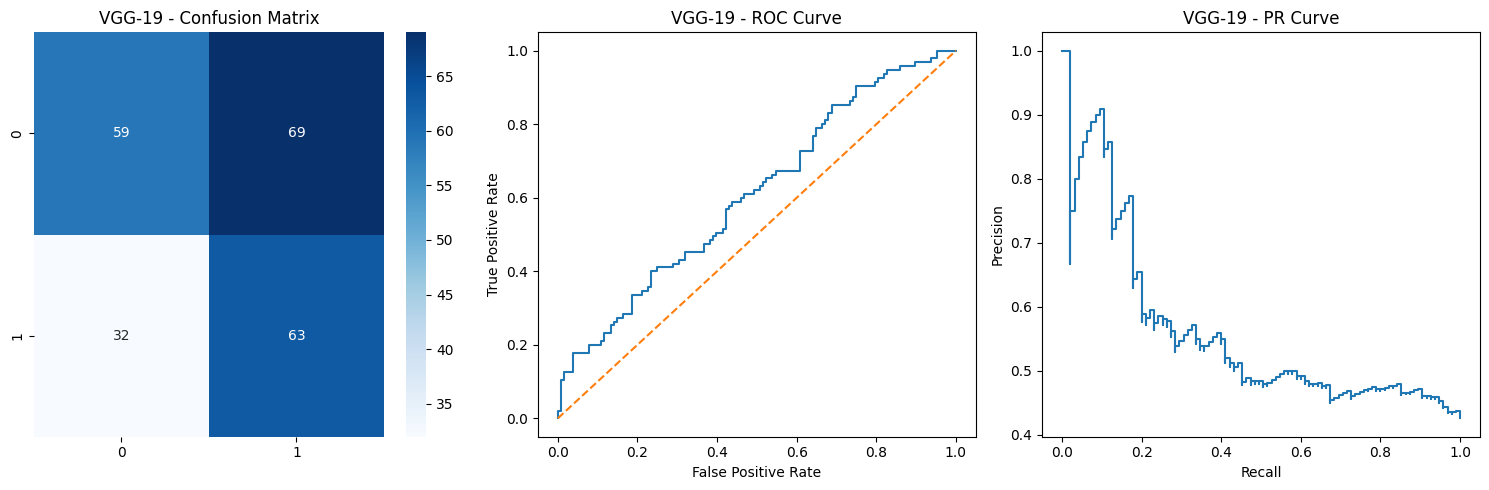


VGG-19 Metrics:
Precision: 0.4773
Recall: 0.6632
F1 Score: 0.5551
ROC AUC: 0.6083
Average Precision: 0.5626


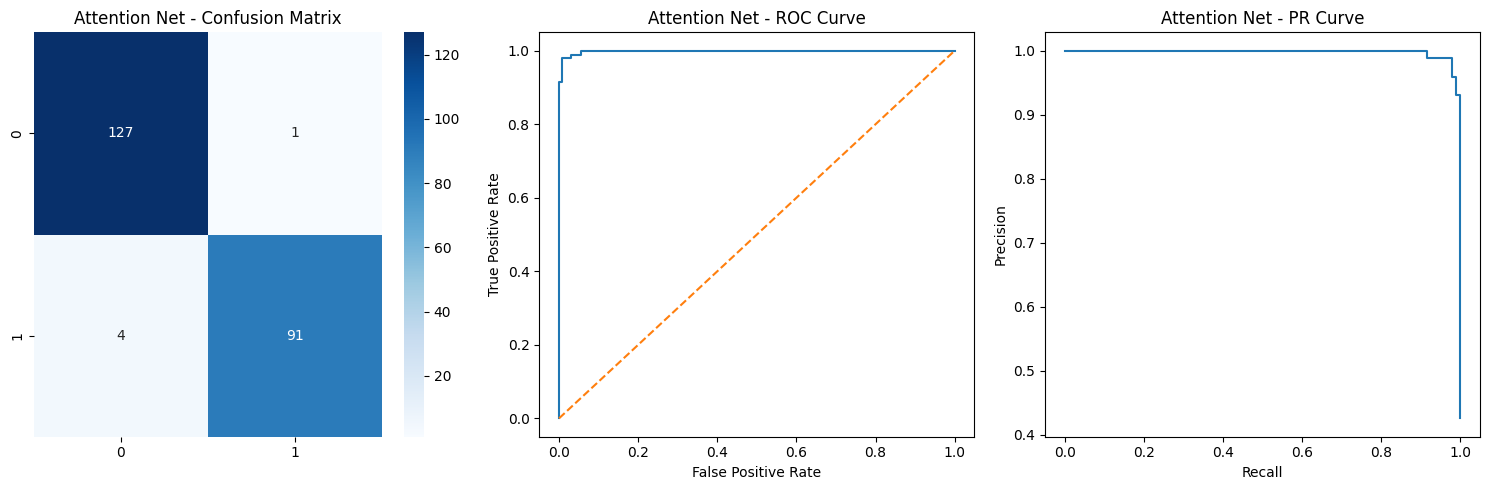


Attention Net Metrics:
Precision: 0.9891
Recall: 0.9579
F1 Score: 0.9733
ROC AUC: 0.9986
Average Precision: 0.9982


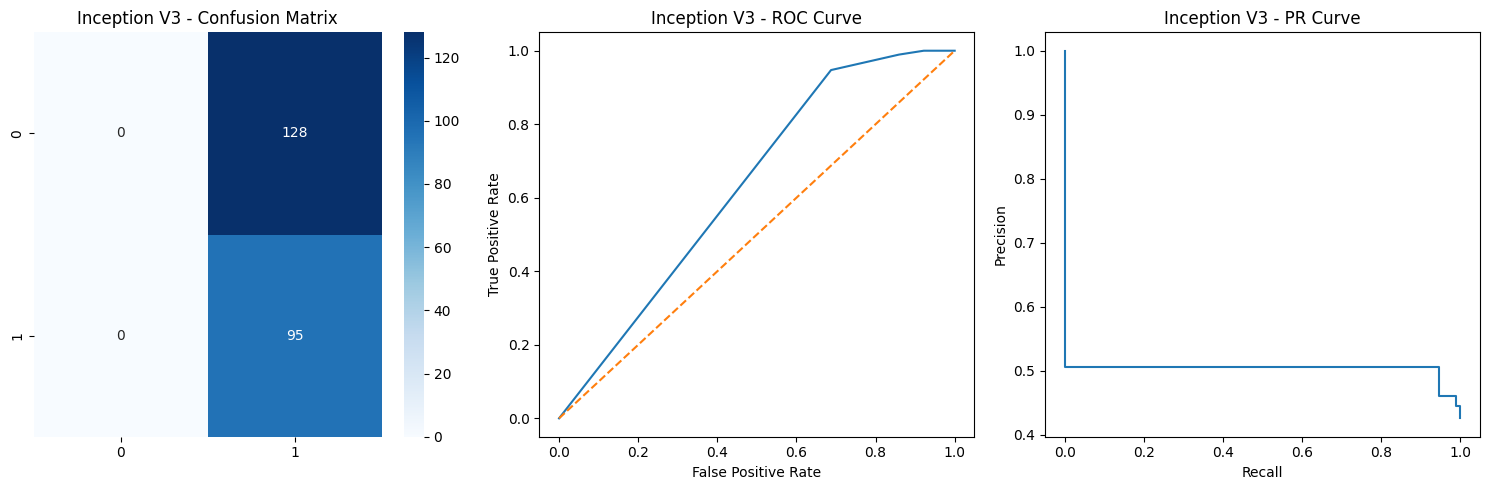


Inception V3 Metrics:
Precision: 0.4260
Recall: 1.0000
F1 Score: 0.5975
ROC AUC: 0.6324
Average Precision: 0.5031


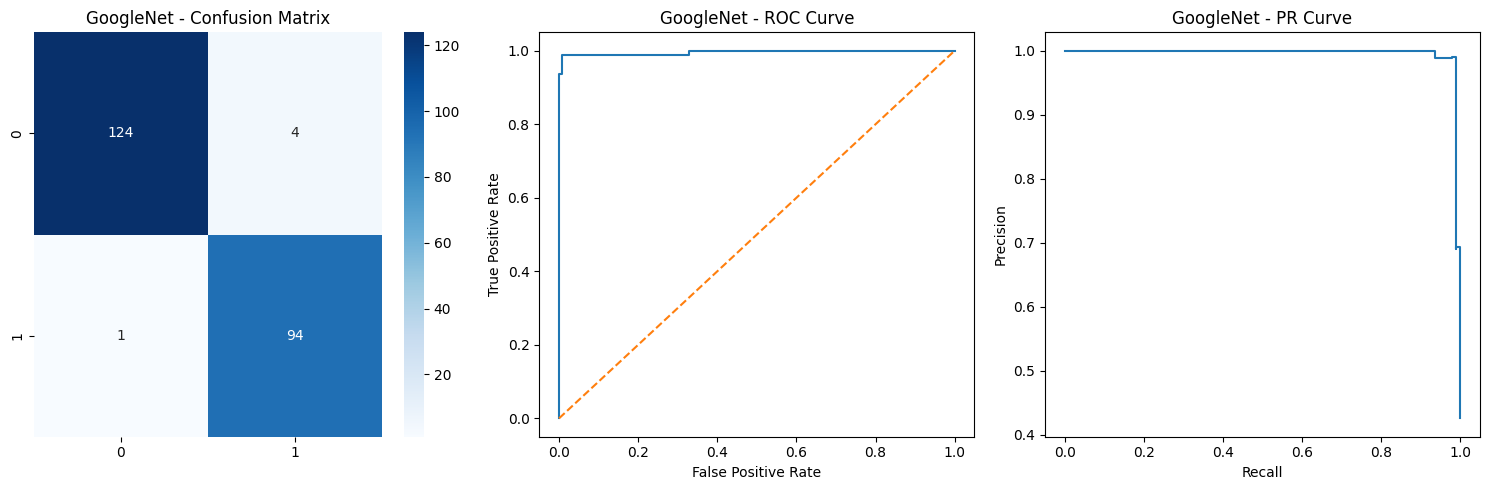


GoogleNet Metrics:
Precision: 0.9592
Recall: 0.9895
F1 Score: 0.9741
ROC AUC: 0.9961
Average Precision: 0.9962


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


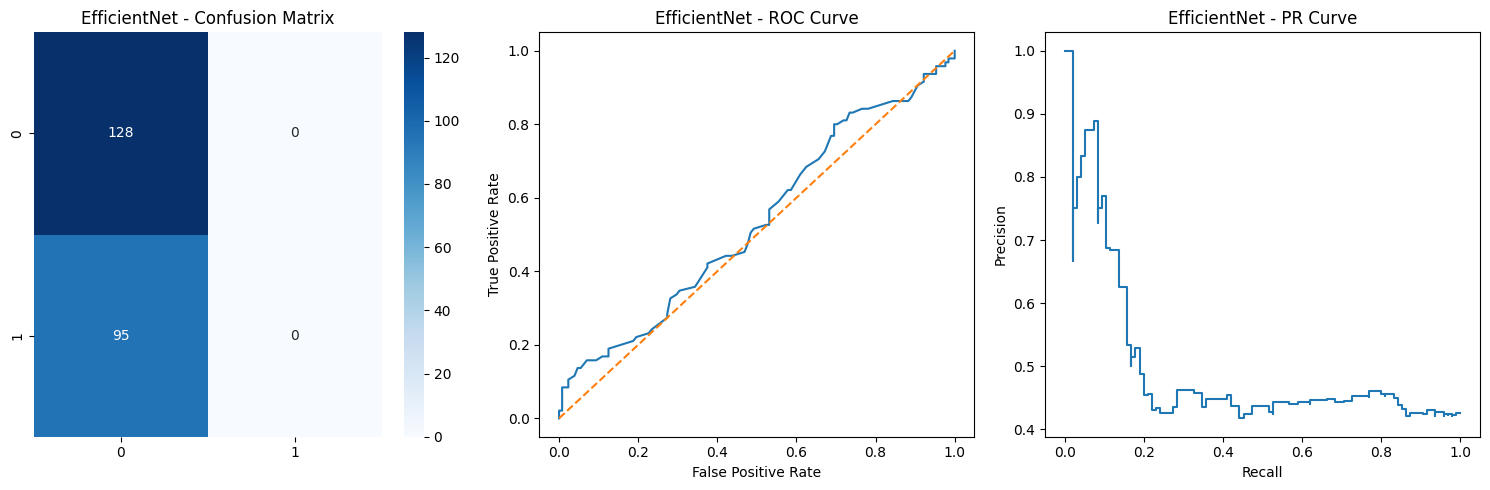


EfficientNet Metrics:
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.5347
Average Precision: 0.4998


<Figure size 1200x600 with 0 Axes>

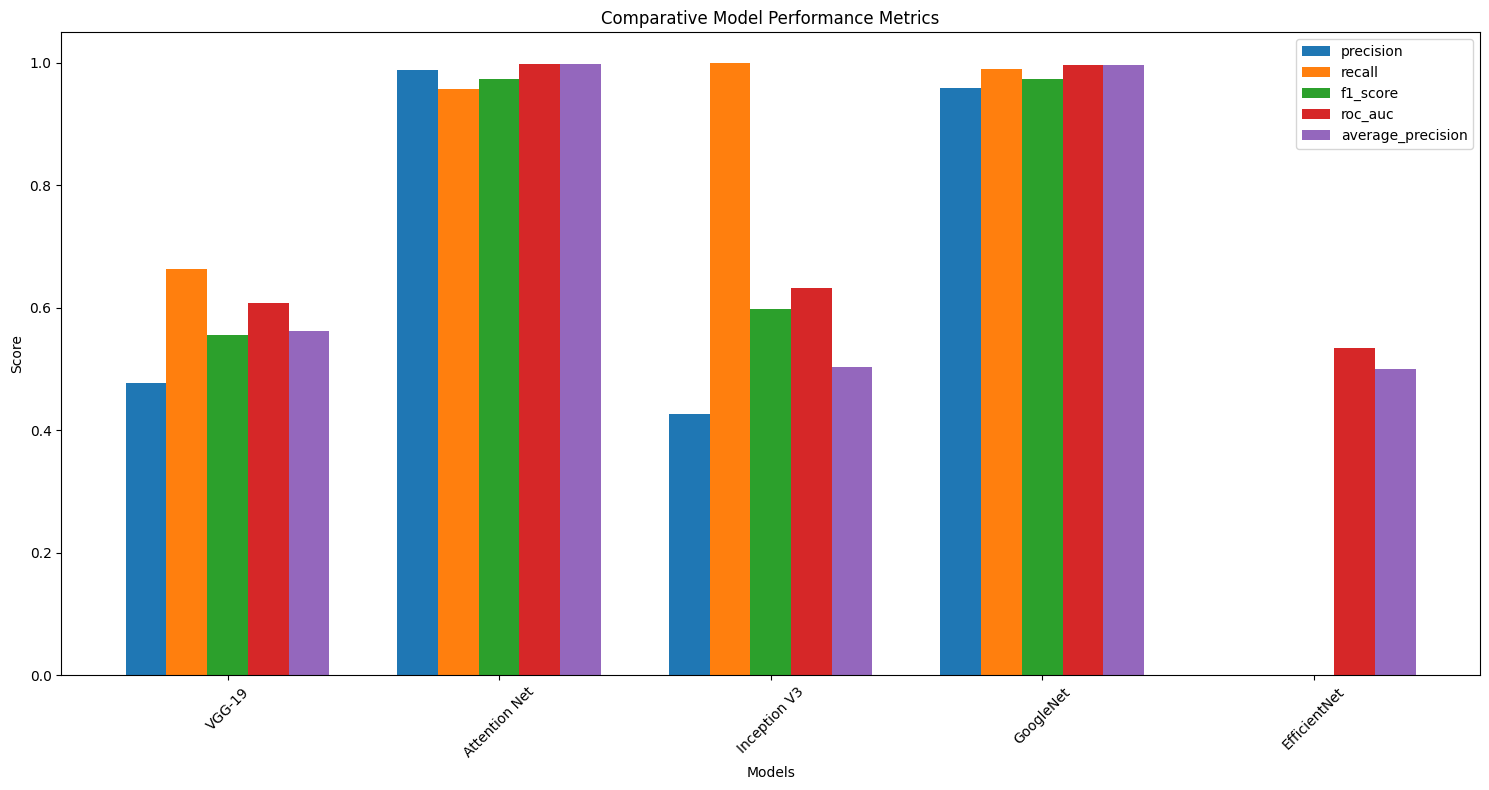


=== Summary of Results ===
VGG-19 - Train Accuracy: 0.5838, Test Accuracy: 0.5471
Attention Net - Train Accuracy: 0.9899, Test Accuracy: 0.9776
Inception V3 - Train Accuracy: 0.4994, Test Accuracy: 0.4260
GoogleNet - Train Accuracy: 0.9955, Test Accuracy: 0.9776
EfficientNet - Train Accuracy: 0.5006, Test Accuracy: 0.5740


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Concatenate, AveragePooling2D, Flatten, BatchNormalization, Multiply
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Additional imports for metrics
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    average_precision_score,
    roc_curve,
    auc,
    f1_score,
    precision_score,
    recall_score,
    classification_report
)
import seaborn as sns

# Load and preprocess data
file_path = "/content/drive/MyDrive/cleaned_autism_dataset.csv"
df = pd.read_csv(file_path)
target_column = "DX_GROUP"
X = df.drop(columns=[target_column])
y = df[target_column]

if y.nunique() > 2:
    y = pd.factorize(y)[0]
else:
    y = (y == 1).astype(int)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for 2D input
num_features = X_scaled.shape[1]
image_size = int(np.sqrt(num_features))

if image_size * image_size > num_features:
    padding_size = image_size**2 - num_features
    X_scaled = np.pad(X_scaled, ((0, 0), (0, padding_size)), mode='constant')
elif image_size * image_size < num_features:
    X_scaled = X_scaled[:, :image_size**2]

X_scaled = X_scaled.reshape(X_scaled.shape[0], image_size, image_size, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a dictionary to store results
results = {}

# Modify evaluate_model function to store predictions
def evaluate_model(model, model_name):
    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=15,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1
    )

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)

    # Predict probabilities and classes
    y_pred_proba = model.predict(X_test).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Store results
    results[model_name] = {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'history': history.history,
        'y_pred_proba': y_pred_proba,
        'y_pred': y_pred
    }

    print(f"{model_name} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    return history

# 1. VGG-19 Model
def create_vgg19_model():
    # Convert grayscale to RGB by repeating the channel 3 times
    input_tensor = Input(shape=(image_size, image_size, 1))
    x = Conv2D(3, (1, 1), padding='same')(input_tensor)

    # Load VGG19 with pre-trained weights
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    base_model.trainable = False  # Freeze the base model

    # Add our custom classification head
    x = base_model(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

# 2. Attention Net (Simple Self-Attention Mechanism)
def create_attention_net():
    inputs = Input(shape=(image_size, image_size, 1))

    # Convolutional blocks
    x = Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)

    x = Conv2D(64, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)

    # Self-attention mechanism
    attention = Conv2D(64, kernel_size=(1,1), activation='sigmoid', padding='same')(x)
    x = Multiply()([x, attention])

    x = Conv2D(128, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)

    # Classification layers
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# 3. Inception V3 Model
def create_inception_v3_model():
    # Handle minimum size requirement for InceptionV3 (75x75)
    min_size = max(75, image_size)
    if image_size < min_size:
        # Use a simplified approach if image is too small
        inputs = Input(shape=(image_size, image_size, 1))
        x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)

        x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)

        x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
        x = BatchNormalization()(x)
        x = GlobalAveragePooling2D()(x)

        x = Dense(256, activation='relu')(x)
        x = Dropout(0.4)(x)
        x = Dense(128, activation='relu')(x)
        x = Dropout(0.3)(x)
        outputs = Dense(1, activation='sigmoid')(x)

        model = Model(inputs=inputs, outputs=outputs)
        return model
    else:
        # Convert grayscale to RGB
        input_tensor = Input(shape=(image_size, image_size, 1))
        x = Conv2D(3, (1, 1), padding='same')(input_tensor)

        # Load InceptionV3 with pre-trained weights
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
        base_model.trainable = False

        # Add our custom classification head
        x = base_model(x)
        x = GlobalAveragePooling2D()(x)
        x = Dense(256, activation='relu')(x)
        x = Dropout(0.4)(x)
        x = Dense(128, activation='relu')(x)
        x = Dropout(0.3)(x)
        output = Dense(1, activation='sigmoid')(x)

        model = Model(inputs=input_tensor, outputs=output)
        return model

# 4. GoogleNet-inspired model (Inception blocks)
def inception_block(x, filters):
    # 1x1 convolution
    path1 = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)

    # 1x1 convolution followed by 3x3 convolution
    path2 = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)
    path2 = Conv2D(filters, (3, 3), padding='same', activation='relu')(path2)

    # 1x1 convolution followed by 5x5 convolution
    path3 = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)
    path3 = Conv2D(filters, (5, 5), padding='same', activation='relu')(path3)

    # Max pooling followed by 1x1 convolution
    path4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = Conv2D(filters, (1, 1), padding='same', activation='relu')(path4)

    # Concatenate paths
    return Concatenate()([path1, path2, path3, path4])

def create_googlenet_model():
    inputs = Input(shape=(image_size, image_size, 1))

    # Initial convolution
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)

    # Inception blocks
    x = inception_block(x, 32)
    x = inception_block(x, 64)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_block(x, 128)
    x = inception_block(x, 256)

    # Use GlobalAveragePooling2D instead of AveragePooling2D
    x = GlobalAveragePooling2D()(x)

    # Classification layers
    x = Dropout(0.4)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# 5. EfficientNet Model
def create_efficientnet_model():
    # Convert grayscale to RGB
    input_tensor = Input(shape=(image_size, image_size, 1))
    x = Conv2D(3, (1, 1), padding='same')(input_tensor)

    # Load EfficientNetB0 with pre-trained weights
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    base_model.trainable = False

    # Add our custom classification head
    x = base_model(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

# Print information about the dataset shape
print(f"Dataset Info:")
print(f"Original feature count: {num_features}")
print(f"Reshaped to: {image_size}x{image_size}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# Train each model
print("\nTraining models...")

# Try/except blocks for each model to handle potential errors
try:
    print("\n=== Training VGG-19 ===")
    vgg_model = create_vgg19_model()
    vgg_history = evaluate_model(vgg_model, 'VGG-19')
    print("VGG-19 training completed successfully")
except Exception as e:
    print(f"Error training VGG-19: {str(e)}")

try:
    print("\n=== Training Attention Net ===")
    attention_model = create_attention_net()
    attention_history = evaluate_model(attention_model, 'Attention Net')
    print("Attention Net training completed successfully")
except Exception as e:
    print(f"Error training Attention Net: {str(e)}")

try:
    print("\n=== Training Inception V3 ===")
    inception_model = create_inception_v3_model()
    inception_history = evaluate_model(inception_model, 'Inception V3')
    print("Inception V3 training completed successfully")
except Exception as e:
    print(f"Error training Inception V3: {str(e)}")

try:
    print("\n=== Training GoogleNet ===")
    googlenet_model = create_googlenet_model()
    googlenet_history = evaluate_model(googlenet_model, 'GoogleNet')
    print("GoogleNet training completed successfully")
except Exception as e:
    print(f"Error training GoogleNet: {str(e)}")

try:
    print("\n=== Training EfficientNet ===")
    efficientnet_model = create_efficientnet_model()
    efficientnet_history = evaluate_model(efficientnet_model, 'EfficientNet')
    print("EfficientNet training completed successfully")
except Exception as e:
    print(f"Error training EfficientNet: {str(e)}")

# Plot results for successfully trained models
plt.figure(figsize=(15, 10))

# Training accuracy
plt.subplot(2, 1, 1)
for name, result in results.items():
    if 'history' in result and 'accuracy' in result['history']:
        plt.plot(result['history']['accuracy'], label=f'{name} - Training')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Validation accuracy
plt.subplot(2, 1, 2)
for name, result in results.items():
    if 'history' in result and 'val_accuracy' in result['history']:
        plt.plot(result['history']['val_accuracy'], label=f'{name} - Validation')
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Metrics Evaluation Function
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Concatenate, AveragePooling2D, Flatten, BatchNormalization, Multiply
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Additional imports for metrics
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    average_precision_score,
    roc_curve,
    auc,
    f1_score,
    precision_score,
    recall_score,
    classification_report
)
import seaborn as sns

# Load and preprocess data
file_path = "/content/drive/MyDrive/cleaned_autism_dataset.csv"
df = pd.read_csv(file_path)
target_column = "DX_GROUP"
X = df.drop(columns=[target_column])
y = df[target_column]

if y.nunique() > 2:
    y = pd.factorize(y)[0]
else:
    y = (y == 1).astype(int)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for 2D input
num_features = X_scaled.shape[1]
image_size = int(np.sqrt(num_features))

if image_size * image_size > num_features:
    padding_size = image_size**2 - num_features
    X_scaled = np.pad(X_scaled, ((0, 0), (0, padding_size)), mode='constant')
elif image_size * image_size < num_features:
    X_scaled = X_scaled[:, :image_size**2]

X_scaled = X_scaled.reshape(X_scaled.shape[0], image_size, image_size, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a dictionary to store results
results = {}

# Modify evaluate_model function to store predictions
def evaluate_model(model, model_name):
    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=15,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1
    )

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)

    # Predict probabilities and classes
    y_pred_proba = model.predict(X_test).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Store results
    results[model_name] = {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'history': history.history,
        'y_pred_proba': y_pred_proba,
        'y_pred': y_pred
    }

    print(f"{model_name} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    return history

# 1. VGG-19 Model
def create_vgg19_model():
    # Convert grayscale to RGB by repeating the channel 3 times
    input_tensor = Input(shape=(image_size, image_size, 1))
    x = Conv2D(3, (1, 1), padding='same')(input_tensor)

    # Load VGG19 with pre-trained weights
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    base_model.trainable = False  # Freeze the base model

    # Add our custom classification head
    x = base_model(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

# 2. Attention Net (Simple Self-Attention Mechanism)
def create_attention_net():
    inputs = Input(shape=(image_size, image_size, 1))

    # Convolutional blocks
    x = Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)

    x = Conv2D(64, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)

    # Self-attention mechanism
    attention = Conv2D(64, kernel_size=(1,1), activation='sigmoid', padding='same')(x)
    x = Multiply()([x, attention])

    x = Conv2D(128, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)

    # Classification layers
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# 3. Inception V3 Model
def create_inception_v3_model():
    # Handle minimum size requirement for InceptionV3 (75x75)
    min_size = max(75, image_size)
    if image_size < min_size:
        # Use a simplified approach if image is too small
        inputs = Input(shape=(image_size, image_size, 1))
        x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)

        x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)

        x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
        x = BatchNormalization()(x)
        x = GlobalAveragePooling2D()(x)

        x = Dense(256, activation='relu')(x)
        x = Dropout(0.4)(x)
        x = Dense(128, activation='relu')(x)
        x = Dropout(0.3)(x)
        outputs = Dense(1, activation='sigmoid')(x)

        model = Model(inputs=inputs, outputs=outputs)
        return model
    else:
        # Convert grayscale to RGB
        input_tensor = Input(shape=(image_size, image_size, 1))
        x = Conv2D(3, (1, 1), padding='same')(input_tensor)

        # Load InceptionV3 with pre-trained weights
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
        base_model.trainable = False

        # Add our custom classification head
        x = base_model(x)
        x = GlobalAveragePooling2D()(x)
        x = Dense(256, activation='relu')(x)
        x = Dropout(0.4)(x)
        x = Dense(128, activation='relu')(x)
        x = Dropout(0.3)(x)
        output = Dense(1, activation='sigmoid')(x)

        model = Model(inputs=input_tensor, outputs=output)
        return model

# 4. GoogleNet-inspired model (Inception blocks)
def inception_block(x, filters):
    # 1x1 convolution
    path1 = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)

    # 1x1 convolution followed by 3x3 convolution
    path2 = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)
    path2 = Conv2D(filters, (3, 3), padding='same', activation='relu')(path2)

    # 1x1 convolution followed by 5x5 convolution
    path3 = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)
    path3 = Conv2D(filters, (5, 5), padding='same', activation='relu')(path3)

    # Max pooling followed by 1x1 convolution
    path4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = Conv2D(filters, (1, 1), padding='same', activation='relu')(path4)

    # Concatenate paths
    return Concatenate()([path1, path2, path3, path4])

def create_googlenet_model():
    inputs = Input(shape=(image_size, image_size, 1))

    # Initial convolution
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)

    # Inception blocks
    x = inception_block(x, 32)
    x = inception_block(x, 64)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_block(x, 128)
    x = inception_block(x, 256)

    # Use GlobalAveragePooling2D instead of AveragePooling2D
    x = GlobalAveragePooling2D()(x)

    # Classification layers
    x = Dropout(0.4)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# 5. EfficientNet Model
def create_efficientnet_model():
    # Convert grayscale to RGB
    input_tensor = Input(shape=(image_size, image_size, 1))
    x = Conv2D(3, (1, 1), padding='same')(input_tensor)

    # Load EfficientNetB0 with pre-trained weights
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    base_model.trainable = False

    # Add our custom classification head
    x = base_model(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

# Print information about the dataset shape
print(f"Dataset Info:")
print(f"Original feature count: {num_features}")
print(f"Reshaped to: {image_size}x{image_size}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# Train each model
print("\nTraining models...")

# Try/except blocks for each model to handle potential errors
try:
    print("\n=== Training VGG-19 ===")
    vgg_model = create_vgg19_model()
    vgg_history = evaluate_model(vgg_model, 'VGG-19')
    print("VGG-19 training completed successfully")
except Exception as e:
    print(f"Error training VGG-19: {str(e)}")

try:
    print("\n=== Training Attention Net ===")
    attention_model = create_attention_net()
    attention_history = evaluate_model(attention_model, 'Attention Net')
    print("Attention Net training completed successfully")
except Exception as e:
    print(f"Error training Attention Net: {str(e)}")

try:
    print("\n=== Training Inception V3 ===")
    inception_model = create_inception_v3_model()
    inception_history = evaluate_model(inception_model, 'Inception V3')
    print("Inception V3 training completed successfully")
except Exception as e:
    print(f"Error training Inception V3: {str(e)}")

try:
    print("\n=== Training GoogleNet ===")
    googlenet_model = create_googlenet_model()
    googlenet_history = evaluate_model(googlenet_model, 'GoogleNet')
    print("GoogleNet training completed successfully")
except Exception as e:
    print(f"Error training GoogleNet: {str(e)}")

try:
    print("\n=== Training EfficientNet ===")
    efficientnet_model = create_efficientnet_model()
    efficientnet_history = evaluate_model(efficientnet_model, 'EfficientNet')
    print("EfficientNet training completed successfully")
except Exception as e:
    print(f"Error training EfficientNet: {str(e)}")

# Plot results for successfully trained models
plt.figure(figsize=(15, 10))

# Training accuracy
plt.subplot(2, 1, 1)
for name, result in results.items():
    if 'history' in result and 'accuracy' in result['history']:
        plt.plot(result['history']['accuracy'], label=f'{name} - Training')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Validation accuracy
plt.subplot(2, 1, 2)
for name, result in results.items():
    if 'history' in result and 'val_accuracy' in result['history']:
        plt.plot(result['history']['val_accuracy'], label=f'{name} - Validation')
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Metrics Evaluation Function
def calculate_model_metrics(y_true, y_pred, y_pred_proba, model_name):
    """
    Calculate comprehensive model metrics
    """
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Metrics calculation
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # ROC and AUC
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall Curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_pred_proba)
    avg_precision = average_precision_score(y_true, y_pred_proba)

    # Visualization
    plt.figure(figsize=(15, 5))

    # Confusion Matrix
    plt.subplot(131)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')

    # ROC Curve
    plt.subplot(132)
    plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')

    # Precision-Recall Curve
    plt.subplot(133)
    plt.step(recall_curve, precision_curve, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} - PR Curve')

    plt.tight_layout()
    plt.show()

    # Print metrics
    print(f"\n{model_name} Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")

    return {
        'confusion_matrix': cm,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'average_precision': avg_precision
    }

# Calculate metrics for each model
model_metrics = {}
for model_name, result in results.items():
    model_metrics[model_name] = calculate_model_metrics(
        y_test,
        result['y_pred'],
        result['y_pred_proba'],
        model_name
    )

# Comparative bar plot of metrics
plt.figure(figsize=(12, 6))
metrics_to_plot = ['precision', 'recall', 'f1_score', 'roc_auc', 'average_precision']

# Prepare data for plotting
plot_data = {metric: [model_metrics[model][metric] for model in model_metrics]
             for metric in metrics_to_plot}

# Create grouped bar plot
x = np.arange(len(model_metrics))
width = 0.15
multiplier = 0

plt.figure(figsize=(15, 8))
for metric, values in plot_data.items():
    offset = width * multiplier
    plt.bar(x + offset, values, width, label=metric)
    multiplier += 1

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparative Model Performance Metrics')
plt.xticks(x + width * 2, list(model_metrics.keys()), rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Summary of results
print("\n=== Summary of Results ===")
for name, result in results.items():
    print(f"{name} - Train Accuracy: {result['train_accuracy']:.4f}, Test Accuracy: {result['test_accuracy']:.4f}")

Dataset Info:
Original feature count: 1133
Reshaped to: 33x33
Training samples: 889
Test samples: 223

Training models...

=== Training VGG-19 ===
Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 340ms/step - accuracy: 0.5054 - loss: 0.7279 - val_accuracy: 0.5740 - val_loss: 0.6849
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.4964 - loss: 0.7306 - val_accuracy: 0.4260 - val_loss: 0.7293
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5077 - loss: 0.7019 - val_accuracy: 0.5740 - val_loss: 0.6869
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5328 - loss: 0.7009 - val_accuracy: 0.4260 - val_loss: 0.6962
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5128 - loss: 0.7006 - val_accuracy: 0.4260 - val_loss: 0.7044
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4842 - loss: 0.7023 - val_accuracy: 0.5740 - val_loss: 0.6917
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5007 - loss: 0.6979 - v

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Attention Net - Train Accuracy: 0.9798, Test Accuracy: 0.9507
Attention Net training completed successfully

=== Training Inception V3 ===
Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.4941 - loss: 0.6958 - val_accuracy: 0.4260 - val_loss: 0.7049
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7423 - loss: 0.6029 - val_accuracy: 0.4260 - val_loss: 0.8177
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9082 - loss: 0.2558 - val_accuracy: 0.4260 - val_loss: 2.6775
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9537 - loss: 0.1351 - val_accuracy: 0.4260 - val_loss: 1.8927
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9573 - loss: 0.0982 - val_accuracy: 0.5740 - val_loss: 0.6502
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9654 - loss: 0.0842 - val_accuracy: 0.4260 - val_loss: 4.9190
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
Inception V3 - Train Accuracy: 0.7998, Test Accuracy: 0.8341
Inception V3 training completed successfully

=== Training GoogleNet ===
Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 30s 528ms/step - accuracy: 0.5338 - loss: 0.8120 - val_accuracy: 0.5740 - val_loss: 0.6926
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5254 - loss: 0.6843 - val_accuracy: 0.5830 - val_loss: 0.6805
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8170 - loss: 0.4373 - val_accuracy: 0.5740 - val_loss: 0.6605
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9395 - loss: 0.1533 - val_accuracy: 0.6143 - val_loss: 0.6106
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9693 - loss: 0.0864 - val_accuracy: 0.6368 - val_loss: 0.5929
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9845 - loss: 0.0500 - val_accuracy: 0.7713 - val_loss: 0.5468
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0

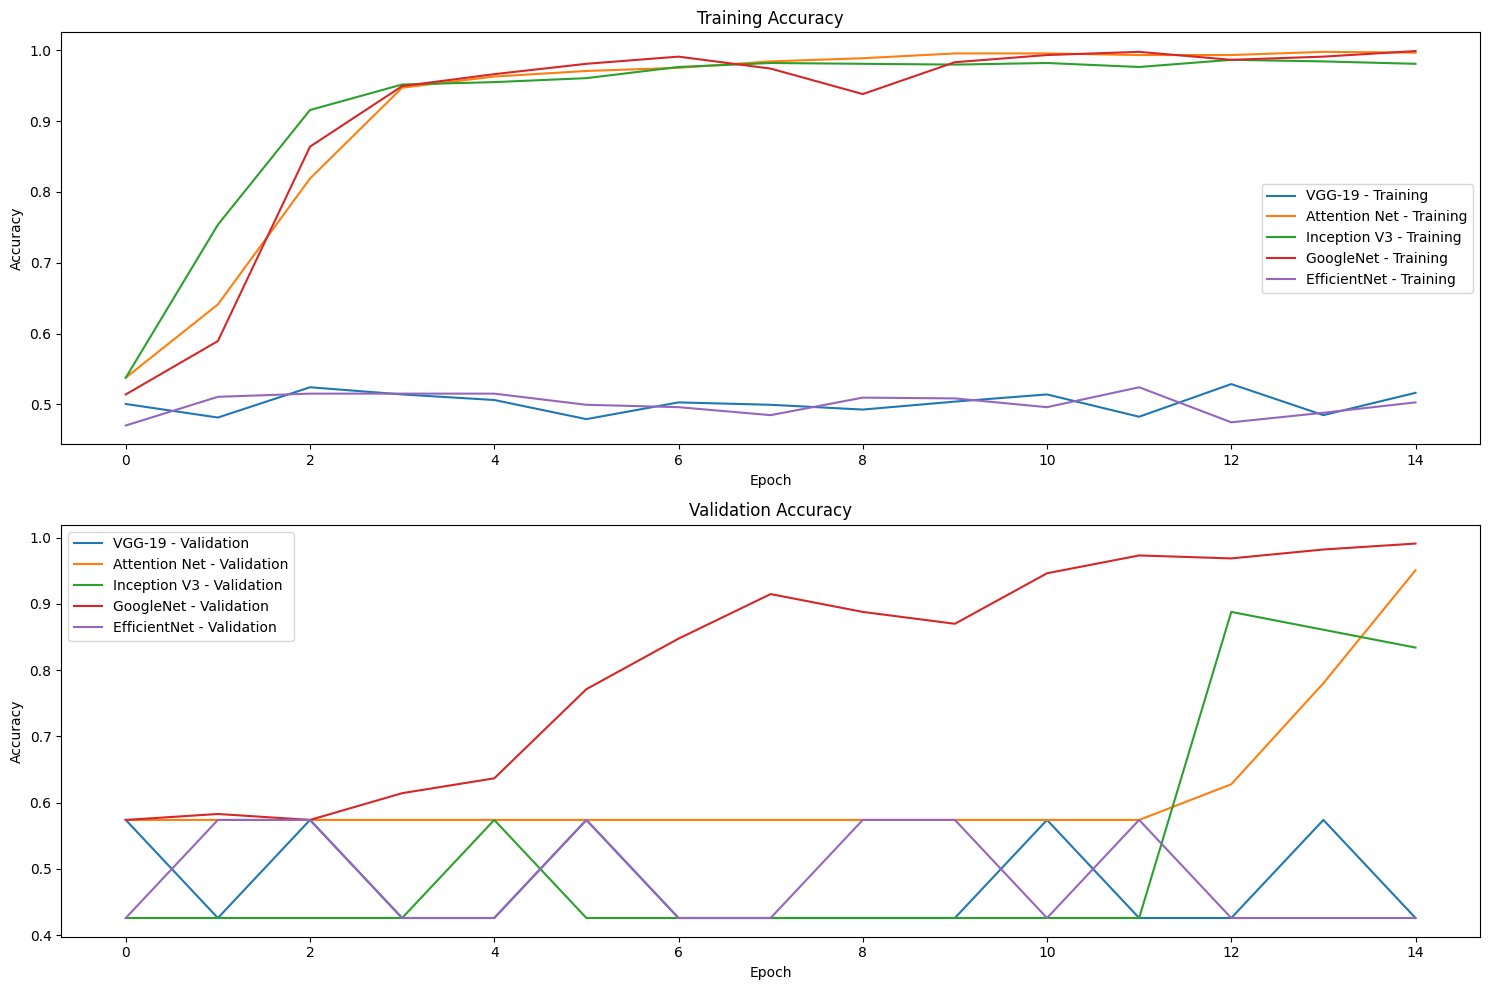

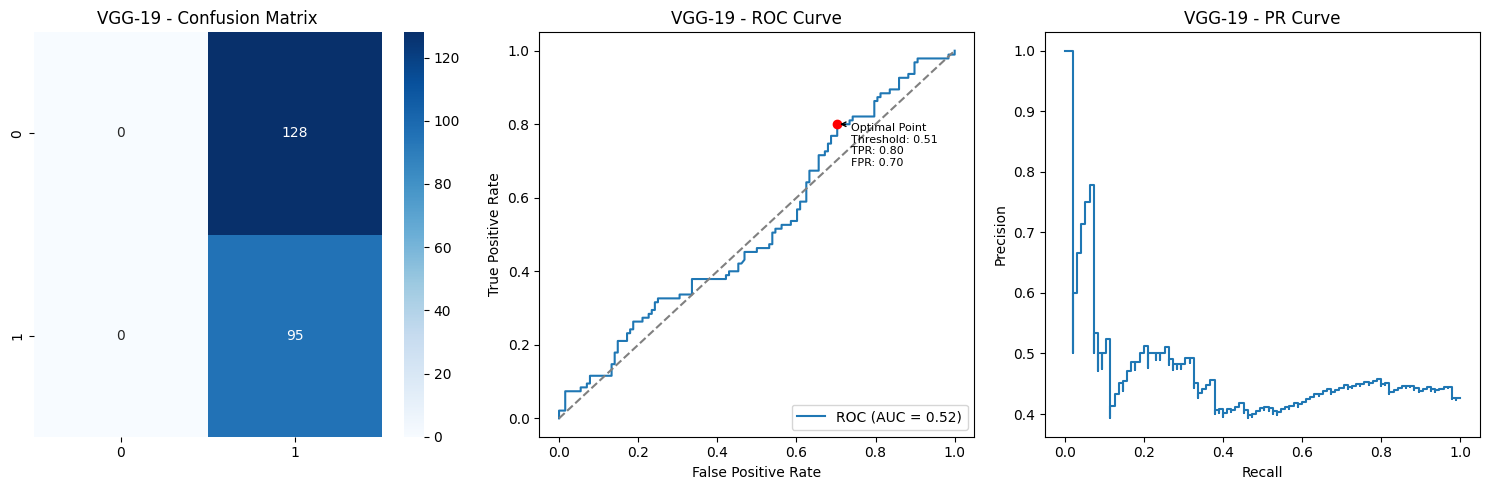


VGG-19 Metrics:
Precision: 0.4260
Recall: 1.0000
F1 Score: 0.5975
ROC AUC: 0.5218
Average Precision: 0.4716
Optimal Threshold: 0.5071


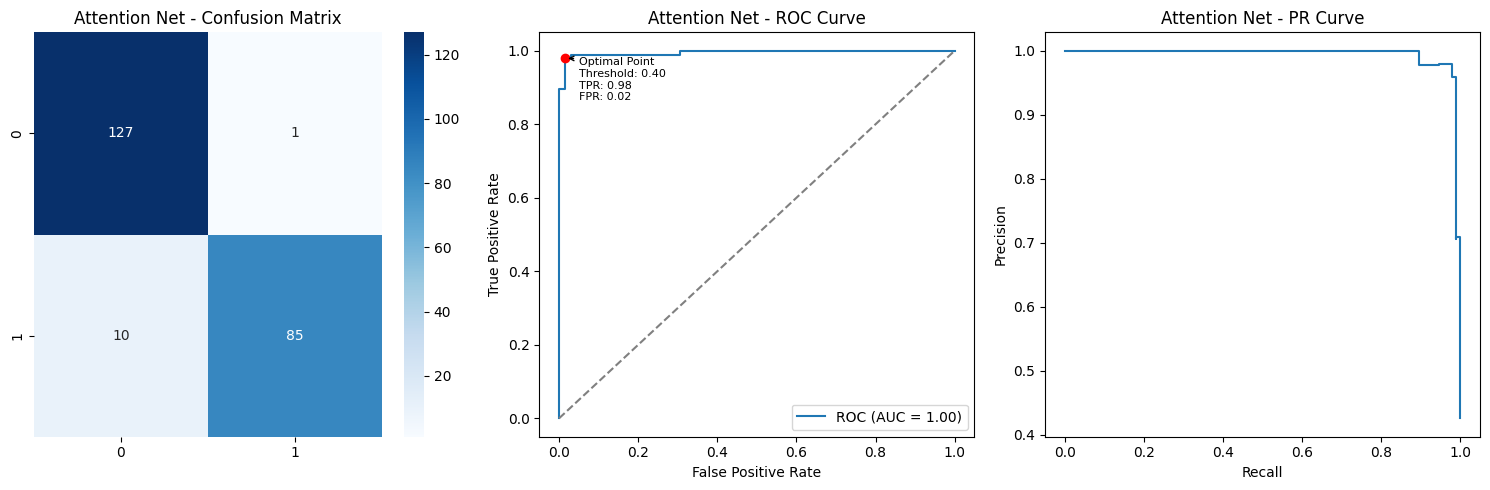


Attention Net Metrics:
Precision: 0.9884
Recall: 0.8947
F1 Score: 0.9392
ROC AUC: 0.9951
Average Precision: 0.9947
Optimal Threshold: 0.3961


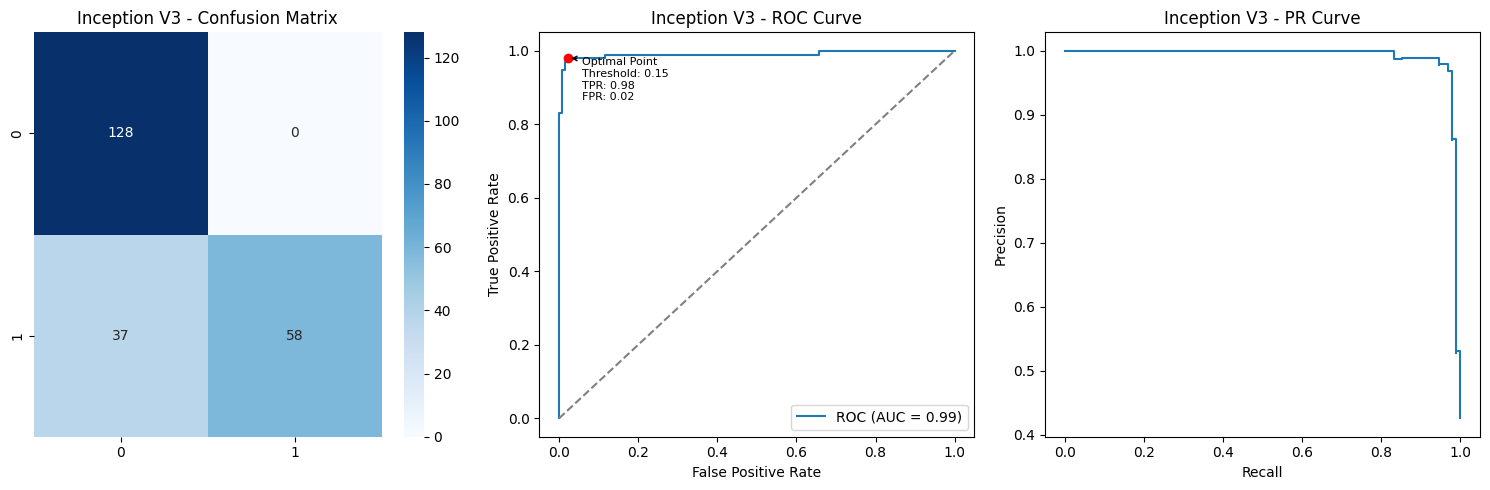


Inception V3 Metrics:
Precision: 1.0000
Recall: 0.6105
F1 Score: 0.7582
ROC AUC: 0.9904
Average Precision: 0.9915
Optimal Threshold: 0.1466


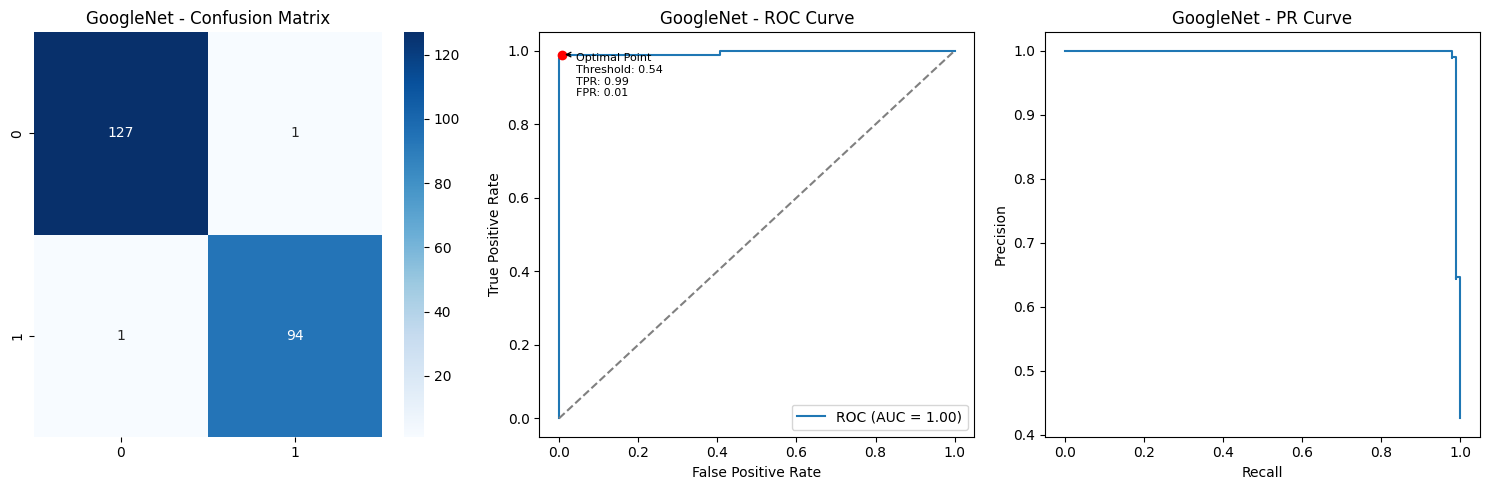


GoogleNet Metrics:
Precision: 0.9895
Recall: 0.9895
F1 Score: 0.9895
ROC AUC: 0.9956
Average Precision: 0.9962
Optimal Threshold: 0.5368


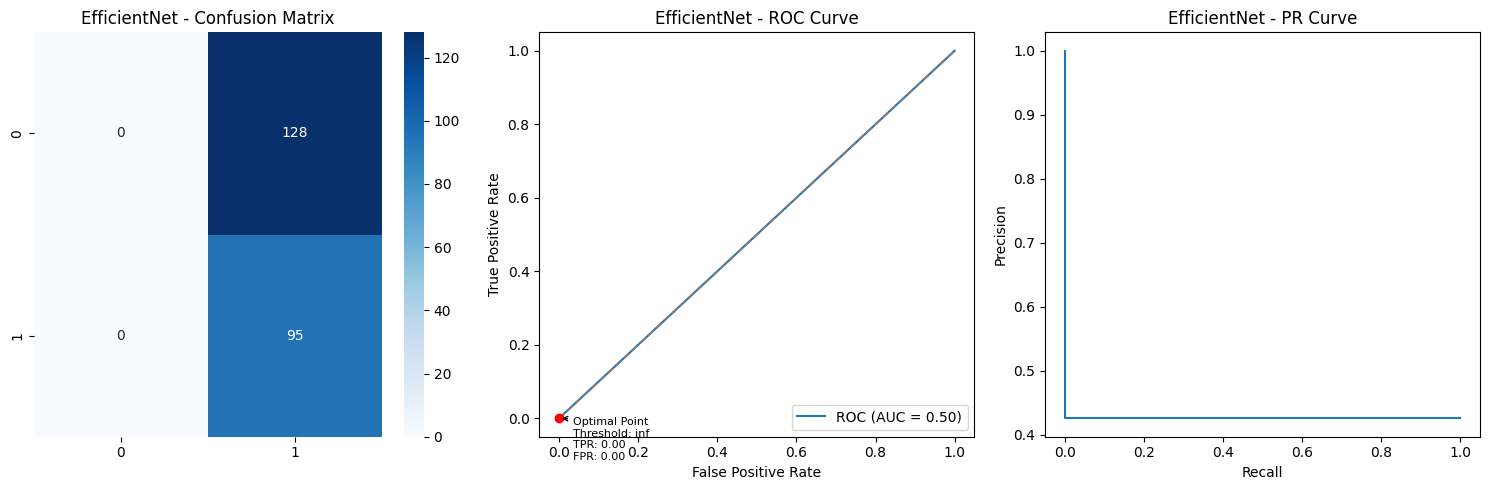


EfficientNet Metrics:
Precision: 0.4260
Recall: 1.0000
F1 Score: 0.5975
ROC AUC: 0.5000
Average Precision: 0.4260
Optimal Threshold: inf


<Figure size 1200x600 with 0 Axes>

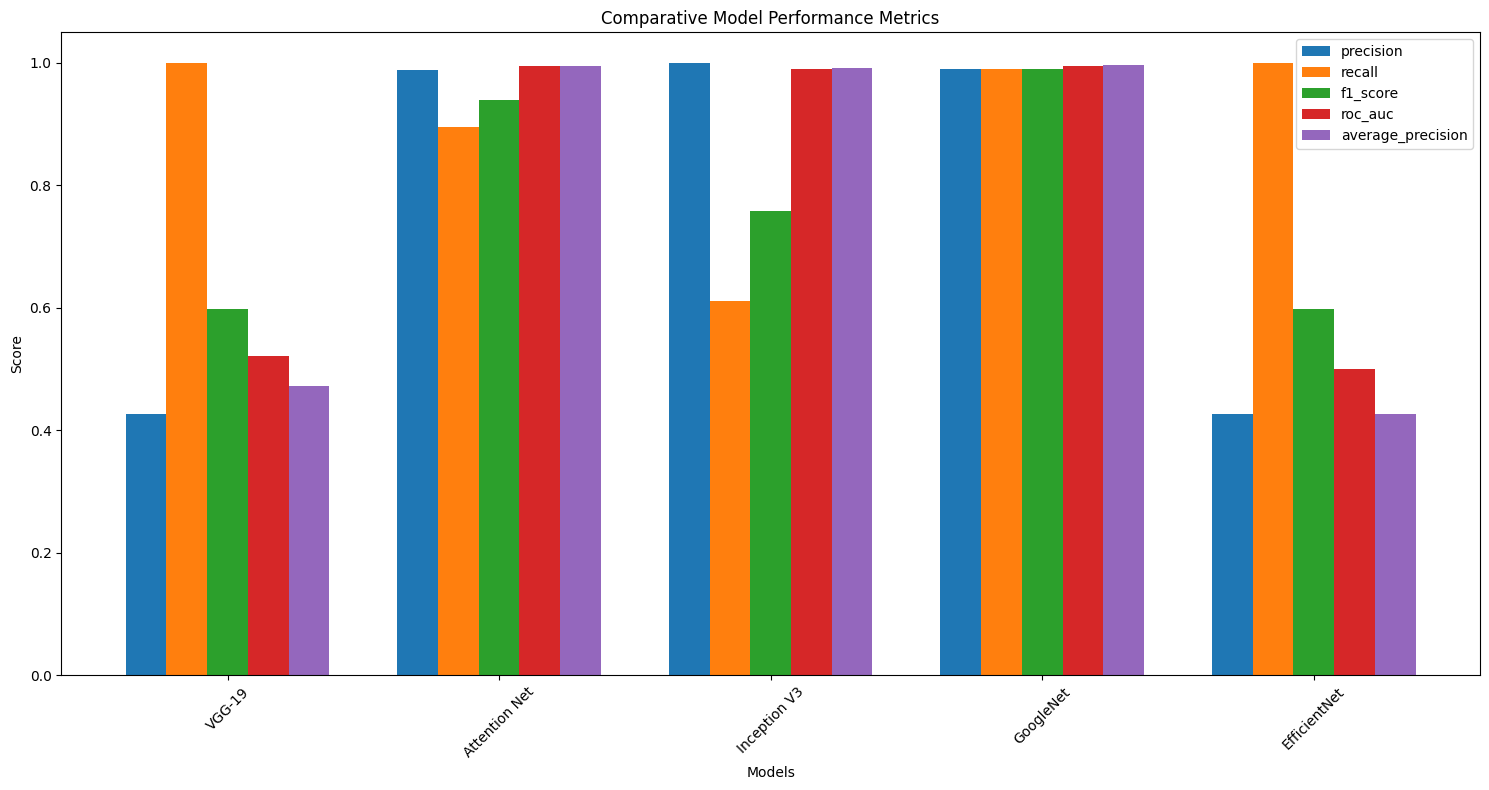


=== Summary of Results ===
VGG-19 - Train Accuracy: 0.4994, Test Accuracy: 0.4260
Attention Net - Train Accuracy: 0.9798, Test Accuracy: 0.9507
Inception V3 - Train Accuracy: 0.7998, Test Accuracy: 0.8341
GoogleNet - Train Accuracy: 0.9978, Test Accuracy: 0.9910
EfficientNet - Train Accuracy: 0.4994, Test Accuracy: 0.4260


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Concatenate, AveragePooling2D, Flatten, BatchNormalization, Multiply
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Additional imports for metrics
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    average_precision_score,
    roc_curve,
    auc,
    f1_score,
    precision_score,
    recall_score,
    classification_report
)
import seaborn as sns

# Load and preprocess data
file_path = "/content/drive/MyDrive/cleaned_autism_dataset.csv"
df = pd.read_csv(file_path)
target_column = "DX_GROUP"
X = df.drop(columns=[target_column])
y = df[target_column]

if y.nunique() > 2:
    y = pd.factorize(y)[0]
else:
    y = (y == 1).astype(int)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for 2D input
num_features = X_scaled.shape[1]
image_size = int(np.sqrt(num_features))

if image_size * image_size > num_features:
    padding_size = image_size**2 - num_features
    X_scaled = np.pad(X_scaled, ((0, 0), (0, padding_size)), mode='constant')
elif image_size * image_size < num_features:
    X_scaled = X_scaled[:, :image_size**2]

X_scaled = X_scaled.reshape(X_scaled.shape[0], image_size, image_size, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a dictionary to store results
results = {}

# Modify evaluate_model function to store predictions
def evaluate_model(model, model_name):
    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=15,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=1
    )

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)

    # Predict probabilities and classes
    y_pred_proba = model.predict(X_test).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Store results
    results[model_name] = {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'history': history.history,
        'y_pred_proba': y_pred_proba,
        'y_pred': y_pred
    }

    print(f"{model_name} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    return history

# 1. VGG-19 Model
def create_vgg19_model():
    # Convert grayscale to RGB by repeating the channel 3 times
    input_tensor = Input(shape=(image_size, image_size, 1))
    x = Conv2D(3, (1, 1), padding='same')(input_tensor)

    # Load VGG19 with pre-trained weights
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    base_model.trainable = False  # Freeze the base model

    # Add our custom classification head
    x = base_model(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

# 2. Attention Net (Simple Self-Attention Mechanism)
def create_attention_net():
    inputs = Input(shape=(image_size, image_size, 1))

    # Convolutional blocks
    x = Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)

    x = Conv2D(64, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)

    # Self-attention mechanism
    attention = Conv2D(64, kernel_size=(1,1), activation='sigmoid', padding='same')(x)
    x = Multiply()([x, attention])

    x = Conv2D(128, kernel_size=(3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)

    # Classification layers
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# 3. Inception V3 Model
def create_inception_v3_model():
    # Handle minimum size requirement for InceptionV3 (75x75)
    min_size = max(75, image_size)
    if image_size < min_size:
        # Use a simplified approach if image is too small
        inputs = Input(shape=(image_size, image_size, 1))
        x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)

        x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)

        x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
        x = BatchNormalization()(x)
        x = GlobalAveragePooling2D()(x)

        x = Dense(256, activation='relu')(x)
        x = Dropout(0.4)(x)
        x = Dense(128, activation='relu')(x)
        x = Dropout(0.3)(x)
        outputs = Dense(1, activation='sigmoid')(x)

        model = Model(inputs=inputs, outputs=outputs)
        return model
    else:
        # Convert grayscale to RGB
        input_tensor = Input(shape=(image_size, image_size, 1))
        x = Conv2D(3, (1, 1), padding='same')(input_tensor)

        # Load InceptionV3 with pre-trained weights
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
        base_model.trainable = False

        # Add our custom classification head
        x = base_model(x)
        x = GlobalAveragePooling2D()(x)
        x = Dense(256, activation='relu')(x)
        x = Dropout(0.4)(x)
        x = Dense(128, activation='relu')(x)
        x = Dropout(0.3)(x)
        output = Dense(1, activation='sigmoid')(x)

        model = Model(inputs=input_tensor, outputs=output)
        return model

# 4. GoogleNet-inspired model (Inception blocks)
def inception_block(x, filters):
    # 1x1 convolution
    path1 = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)

    # 1x1 convolution followed by 3x3 convolution
    path2 = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)
    path2 = Conv2D(filters, (3, 3), padding='same', activation='relu')(path2)

    # 1x1 convolution followed by 5x5 convolution
    path3 = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)
    path3 = Conv2D(filters, (5, 5), padding='same', activation='relu')(path3)

    # Max pooling followed by 1x1 convolution
    path4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = Conv2D(filters, (1, 1), padding='same', activation='relu')(path4)

    # Concatenate paths
    return Concatenate()([path1, path2, path3, path4])

def create_googlenet_model():
    inputs = Input(shape=(image_size, image_size, 1))

    # Initial convolution
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)

    # Inception blocks
    x = inception_block(x, 32)
    x = inception_block(x, 64)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_block(x, 128)
    x = inception_block(x, 256)

    # Use GlobalAveragePooling2D instead of AveragePooling2D
    x = GlobalAveragePooling2D()(x)

    # Classification layers
    x = Dropout(0.4)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# 5. EfficientNet Model
def create_efficientnet_model():
    # Convert grayscale to RGB
    input_tensor = Input(shape=(image_size, image_size, 1))
    x = Conv2D(3, (1, 1), padding='same')(input_tensor)

    # Load EfficientNetB0 with pre-trained weights
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    base_model.trainable = False

    # Add our custom classification head
    x = base_model(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

# Print information about the dataset shape
print(f"Dataset Info:")
print(f"Original feature count: {num_features}")
print(f"Reshaped to: {image_size}x{image_size}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# Train each model
print("\nTraining models...")

# Try/except blocks for each model to handle potential errors
try:
    print("\n=== Training VGG-19 ===")
    vgg_model = create_vgg19_model()
    vgg_history = evaluate_model(vgg_model, 'VGG-19')
    print("VGG-19 training completed successfully")
except Exception as e:
    print(f"Error training VGG-19: {str(e)}")

try:
    print("\n=== Training Attention Net ===")
    attention_model = create_attention_net()
    attention_history = evaluate_model(attention_model, 'Attention Net')
    print("Attention Net training completed successfully")
except Exception as e:
    print(f"Error training Attention Net: {str(e)}")

try:
    print("\n=== Training Inception V3 ===")
    inception_model = create_inception_v3_model()
    inception_history = evaluate_model(inception_model, 'Inception V3')
    print("Inception V3 training completed successfully")
except Exception as e:
    print(f"Error training Inception V3: {str(e)}")

try:
    print("\n=== Training GoogleNet ===")
    googlenet_model = create_googlenet_model()
    googlenet_history = evaluate_model(googlenet_model, 'GoogleNet')
    print("GoogleNet training completed successfully")
except Exception as e:
    print(f"Error training GoogleNet: {str(e)}")

try:
    print("\n=== Training EfficientNet ===")
    efficientnet_model = create_efficientnet_model()
    efficientnet_history = evaluate_model(efficientnet_model, 'EfficientNet')
    print("EfficientNet training completed successfully")
except Exception as e:
    print(f"Error training EfficientNet: {str(e)}")

# Plot results for successfully trained models
plt.figure(figsize=(15, 10))

# Training accuracy
plt.subplot(2, 1, 1)
for name, result in results.items():
    if 'history' in result and 'accuracy' in result['history']:
        plt.plot(result['history']['accuracy'], label=f'{name} - Training')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Validation accuracy
plt.subplot(2, 1, 2)
for name, result in results.items():
    if 'history' in result and 'val_accuracy' in result['history']:
        plt.plot(result['history']['val_accuracy'], label=f'{name} - Validation')
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Metrics Evaluation Function
def calculate_model_metrics(y_true, y_pred, y_pred_proba, model_name):
    """
    Calculate comprehensive model metrics with labeled ROC curve
    """
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Metrics calculation
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # ROC and AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall Curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_pred_proba)
    avg_precision = average_precision_score(y_true, y_pred_proba)

    # Visualization
    plt.figure(figsize=(15, 5))

    # Confusion Matrix
    plt.subplot(131)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')

    # ROC Curve with optimal threshold
    plt.subplot(132)
    # Find the optimal threshold that maximizes the Youden's J statistic
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]

    plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.plot(fpr[ix], tpr[ix], marker='o', color='red')

    # Annotate the optimal point
    plt.annotate(f'Optimal Point\nThreshold: {best_thresh:.2f}\nTPR: {tpr[ix]:.2f}\nFPR: {fpr[ix]:.2f}',
                 xy=(fpr[ix], tpr[ix]),
                 xytext=(10, -30),
                 textcoords='offset points',
                 fontsize=8,
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')

    # Precision-Recall Curve
    plt.subplot(133)
    plt.step(recall_curve, precision_curve, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} - PR Curve')

    plt.tight_layout()
    plt.show()

    # Print metrics
    print(f"\n{model_name} Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Optimal Threshold: {best_thresh:.4f}")

    return {
        'confusion_matrix': cm,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'average_precision': avg_precision,
        'optimal_threshold': best_thresh
    }

# Calculate metrics for each model
model_metrics = {}
for model_name, result in results.items():
    model_metrics[model_name] = calculate_model_metrics(
        y_test,
        result['y_pred'],
        result['y_pred_proba'],
        model_name
    )

# Comparative bar plot of metrics
plt.figure(figsize=(12, 6))
metrics_to_plot = ['precision', 'recall', 'f1_score', 'roc_auc', 'average_precision']

# Prepare data for plotting
plot_data = {metric: [model_metrics[model][metric] for model in model_metrics]
             for metric in metrics_to_plot}

# Create grouped bar plot
x = np.arange(len(model_metrics))
width = 0.15
multiplier = 0

plt.figure(figsize=(15, 8))
for metric, values in plot_data.items():
    offset = width * multiplier
    plt.bar(x + offset, values, width, label=metric)
    multiplier += 1

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparative Model Performance Metrics')
plt.xticks(x + width * 2, list(model_metrics.keys()), rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Summary of results
print("\n=== Summary of Results ===")
for name, result in results.items():
    print(f"{name} - Train Accuracy: {result['train_accuracy']:.4f}, Test Accuracy: {result['test_accuracy']:.4f}")

**Testing**

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


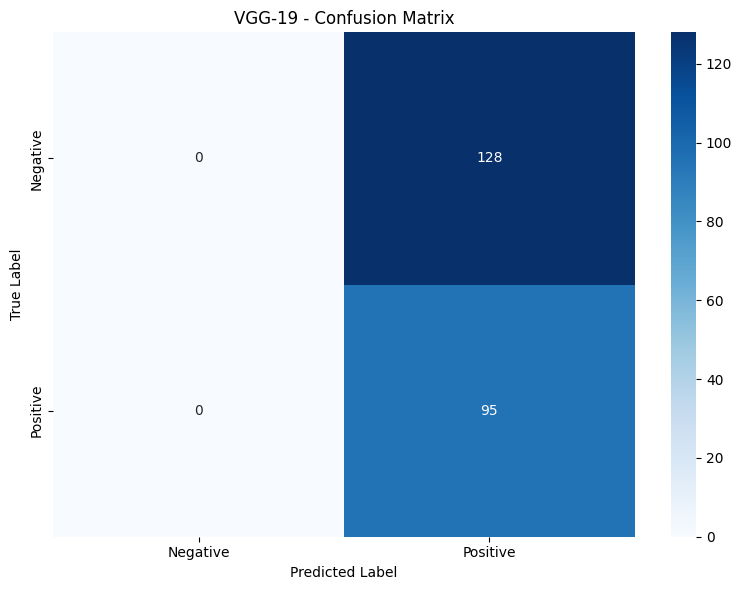

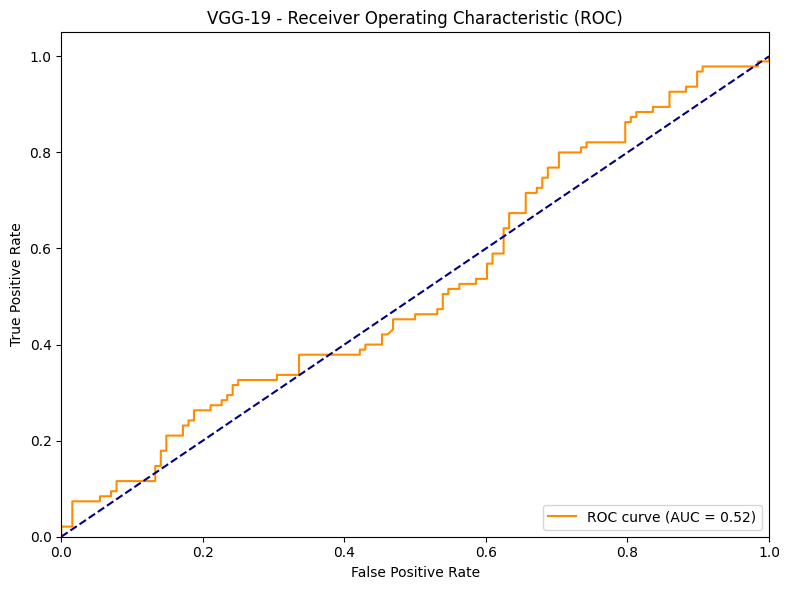

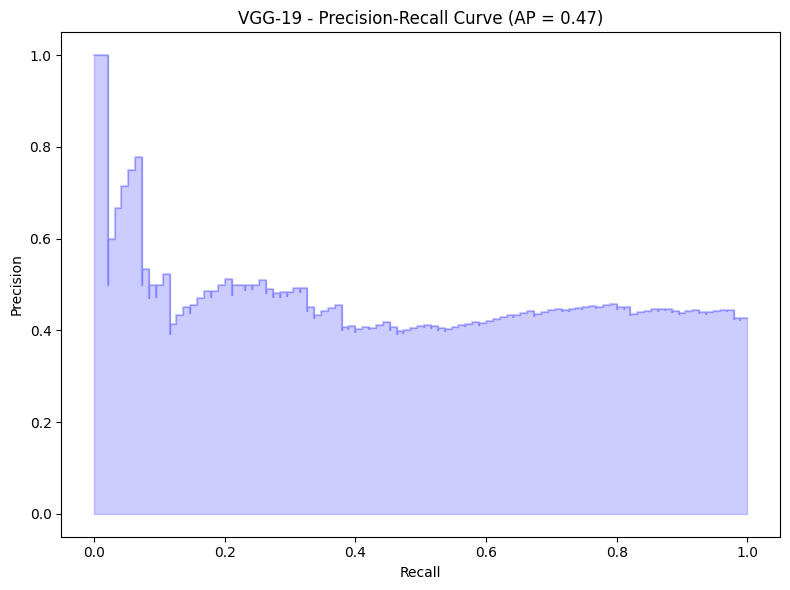

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


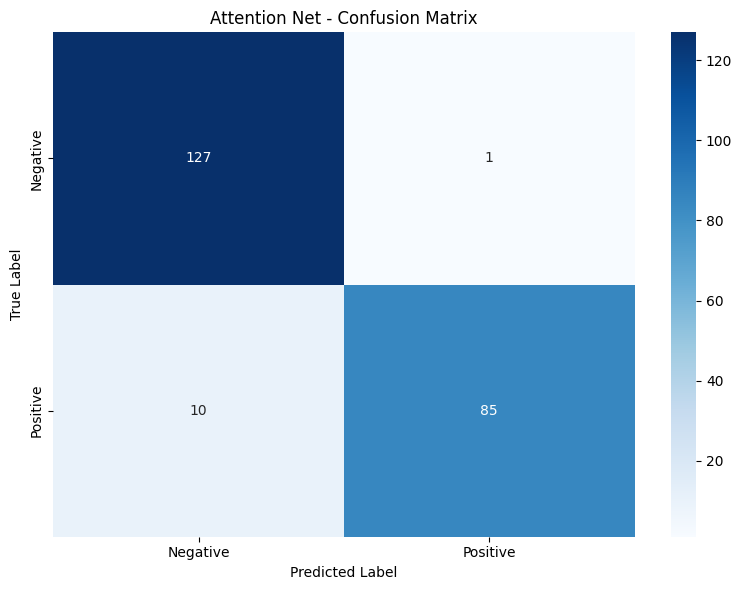

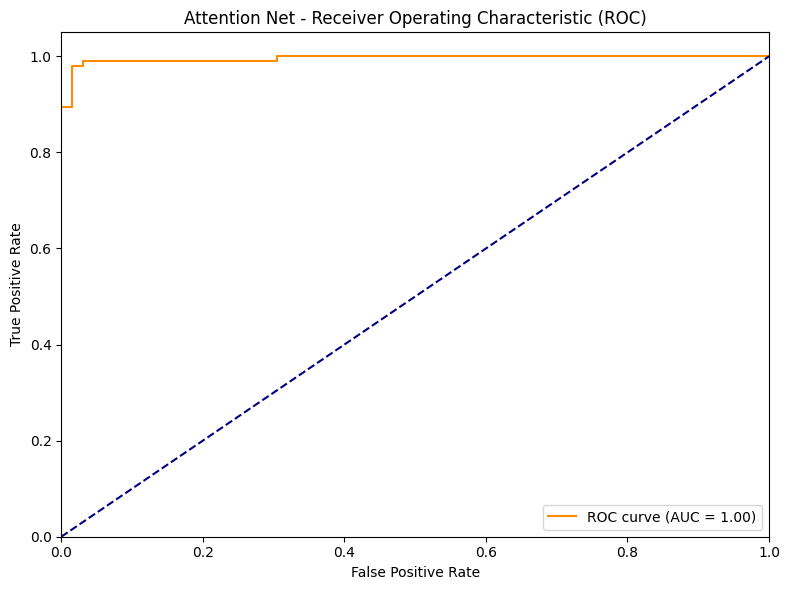

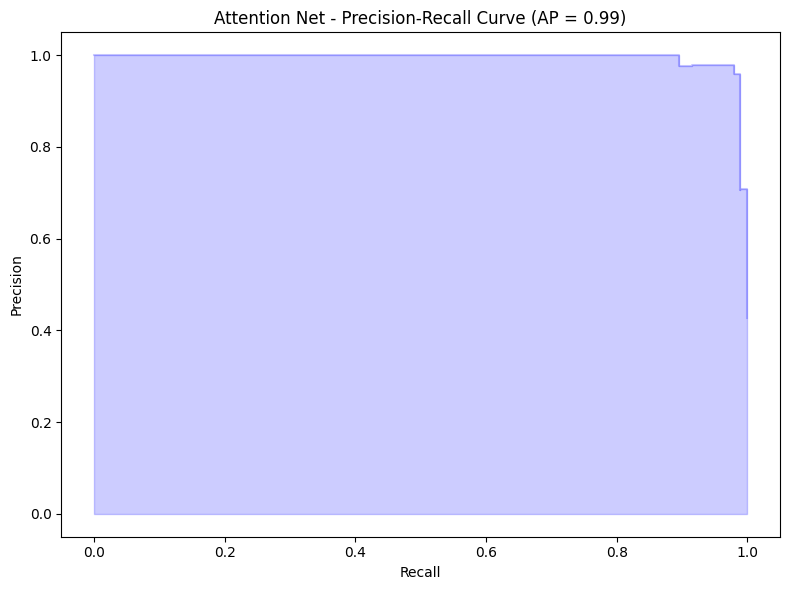

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


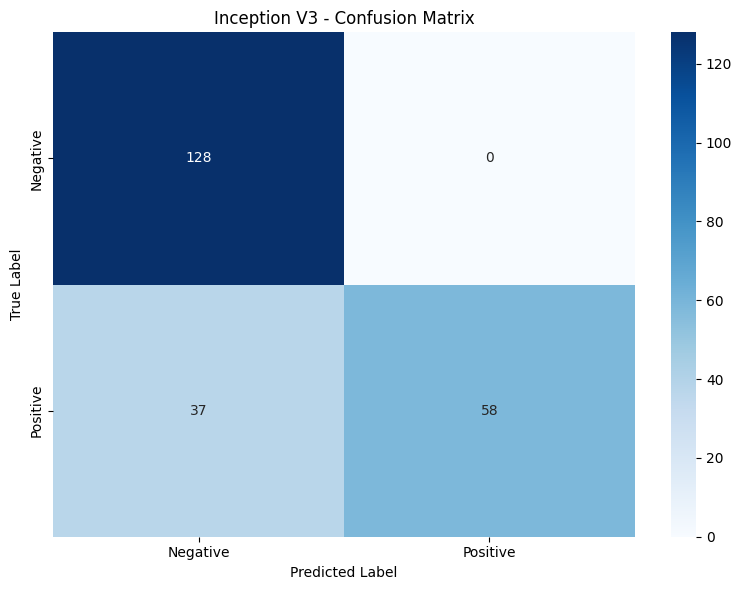

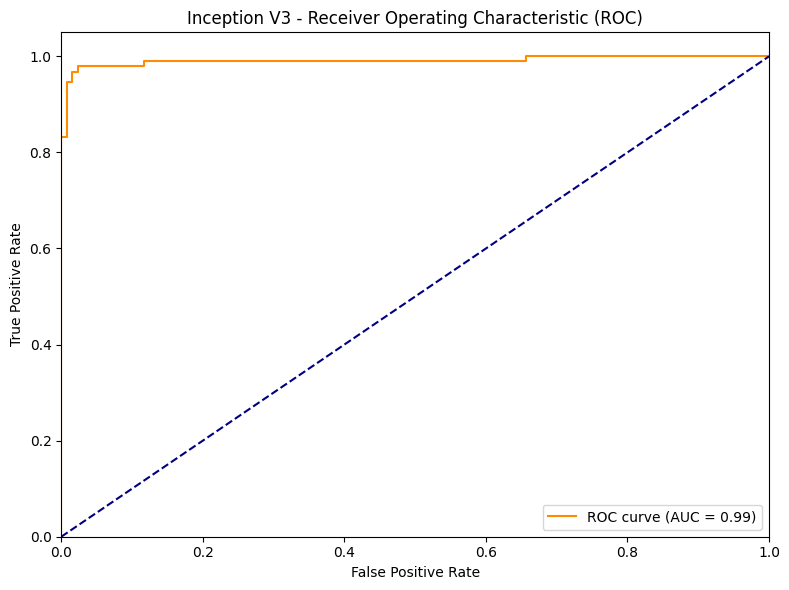

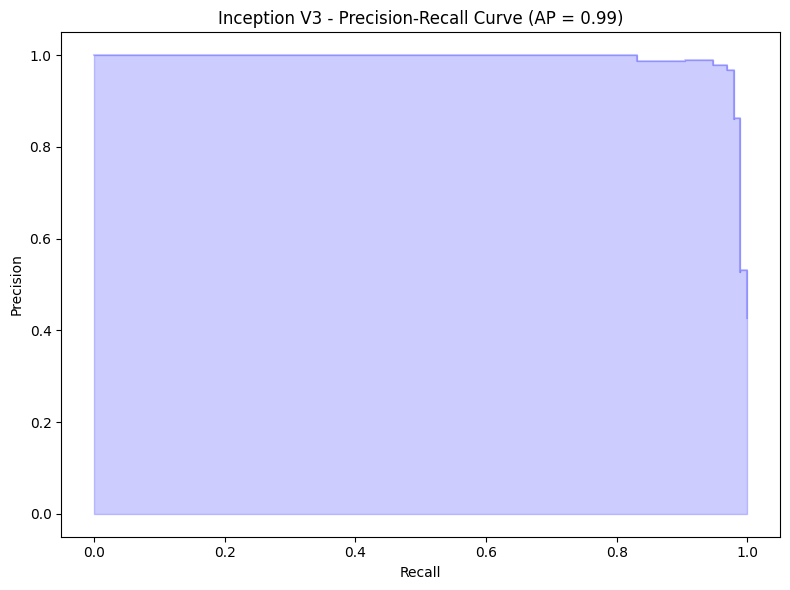

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


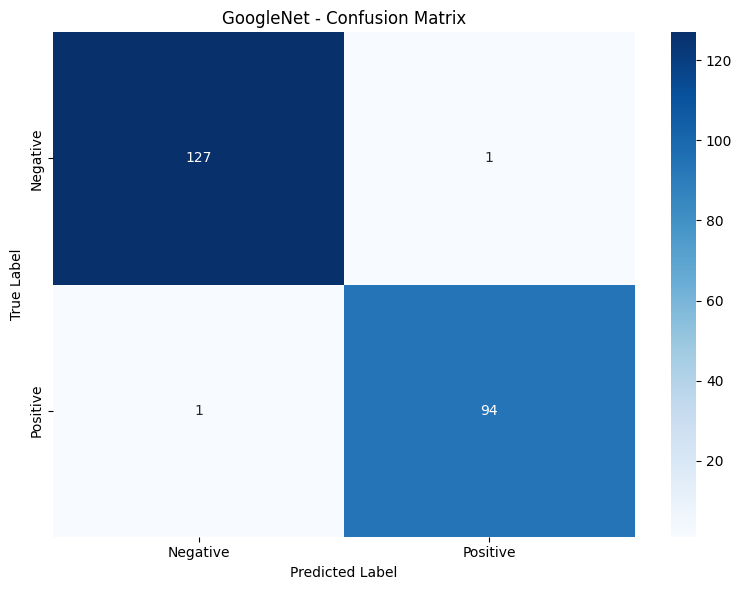

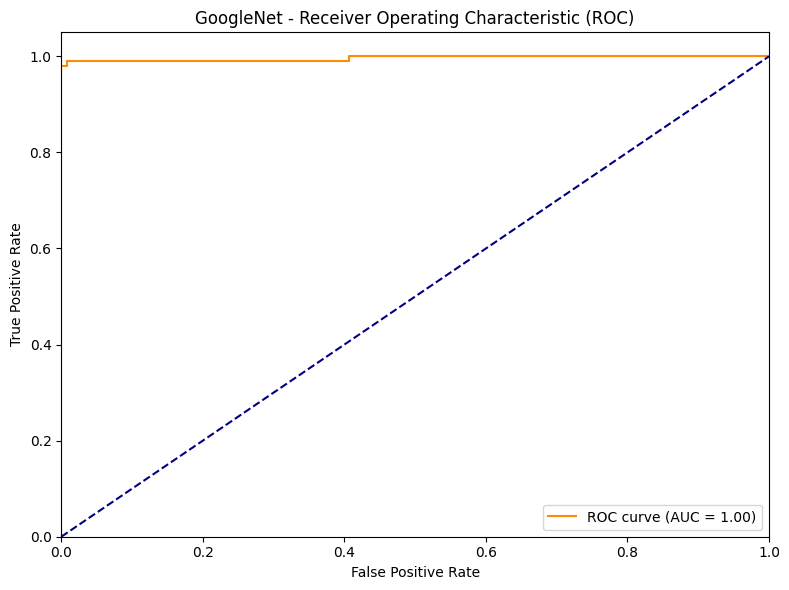

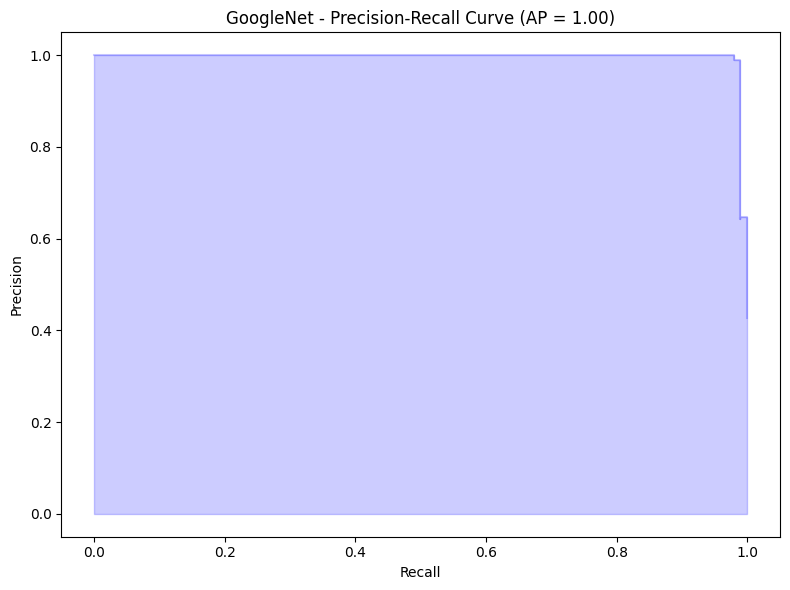

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


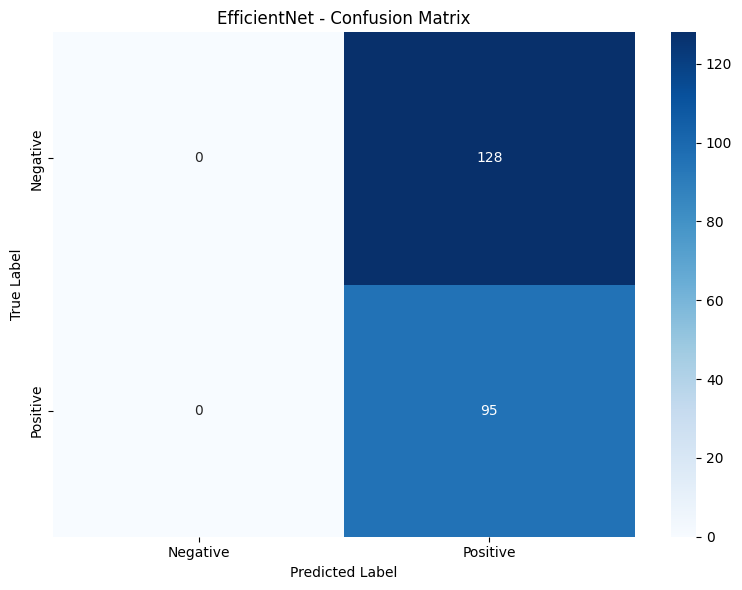

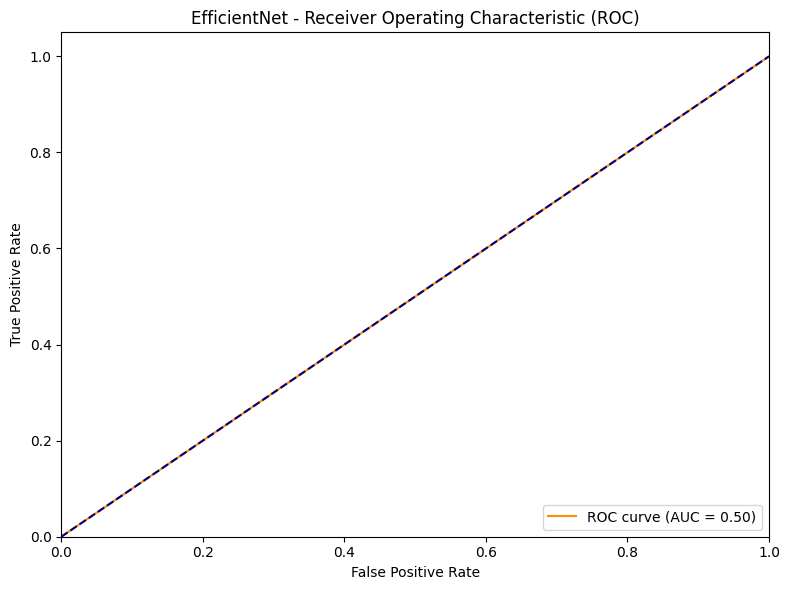

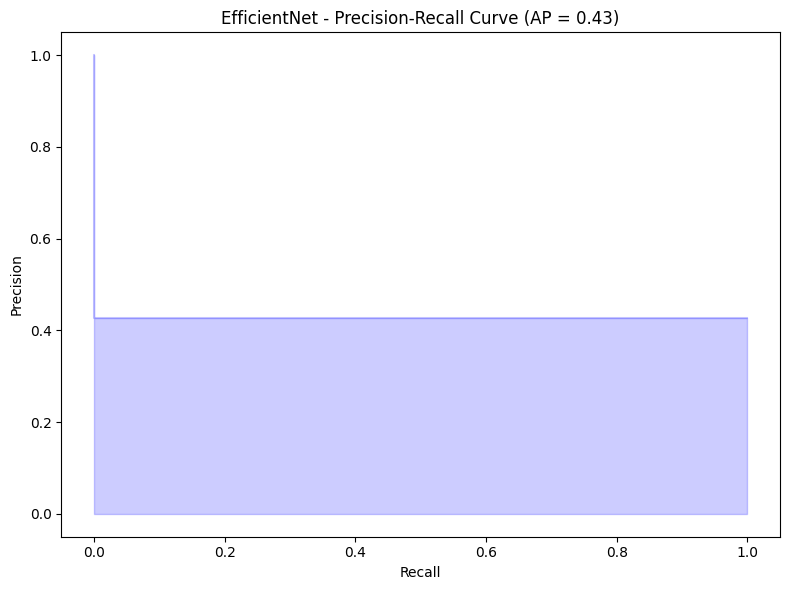


=== Detailed Model Metrics ===

VGG-19 Metrics:
Precision: 0.4260
Recall: 1.0000
F1 Score: 0.5975
ROC AUC: 0.5218
Average Precision: 0.4716

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.43      1.00      0.60        95

    accuracy                           0.43       223
   macro avg       0.21      0.50      0.30       223
weighted avg       0.18      0.43      0.25       223


Attention Net Metrics:
Precision: 0.9884
Recall: 0.8947
F1 Score: 0.9392
ROC AUC: 0.9951
Average Precision: 0.9947

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       128
           1       0.99      0.89      0.94        95

    accuracy                           0.95       223
   macro avg       0.96      0.94      0.95       223
weighted avg       0.95      0.95      0.95       223


Inception V3 Metrics:
Precision: 1.0000


<Figure size 1200x600 with 0 Axes>

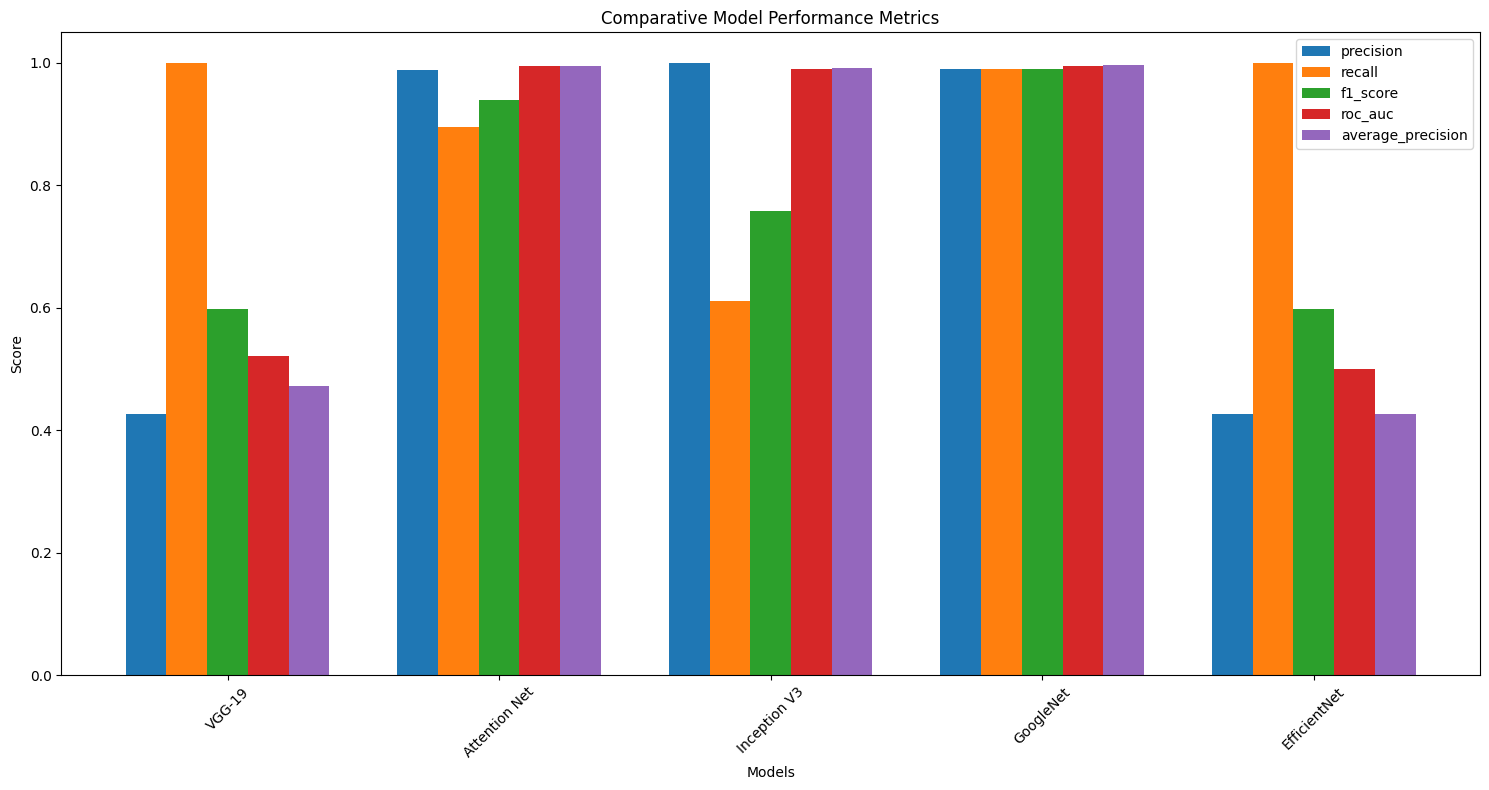

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    average_precision_score,
    roc_curve,
    auc,
    f1_score,
    precision_score,
    recall_score,
    classification_report
)

def evaluate_model_metrics(model, X_test, y_test, model_name):
    """
    Comprehensive model evaluation metrics

    Parameters:
    - model: Trained Keras model
    - X_test: Test features
    - y_test: Test labels
    - model_name: Name of the model for plotting

    Returns:
    - Dictionary of evaluation metrics
    """
    # Predict probabilities and classes
    y_pred_proba = model.predict(X_test).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification Report
    clf_report = classification_report(y_test, y_pred)

    # Precision, Recall, F1 Score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall Curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)

    # Visualization functions
    def plot_confusion_matrix():
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'])
        plt.title(f'{model_name} - Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        plt.show()

    def plot_roc_curve():
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange',
                 label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

    def plot_precision_recall_curve():
        plt.figure(figsize=(8, 6))
        plt.step(recall_curve, precision_curve, color='b', alpha=0.2,
                 where='post')
        plt.fill_between(recall_curve, precision_curve, step='post', alpha=0.2,
                         color='b')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{model_name} - Precision-Recall Curve (AP = {avg_precision:.2f})')
        plt.tight_layout()
        plt.show()

    # Plot visualizations
    plot_confusion_matrix()
    plot_roc_curve()
    plot_precision_recall_curve()

    # Return metrics dictionary
    return {
        'confusion_matrix': cm,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'average_precision': avg_precision,
        'classification_report': clf_report
    }

# Collect metrics for all models
model_metrics = {}

# Dictionary to map model names to their objects
model_dict = {
    'VGG-19': vgg_model,
    'Attention Net': attention_model,
    'Inception V3': inception_model,
    'GoogleNet': googlenet_model,
    'EfficientNet': efficientnet_model
}

# Evaluate each trained model
for model_name, model_result in results.items():
    # Check if the model exists in our dictionary
    if model_name in model_dict:
        current_model = model_dict[model_name]

        # Evaluate and store metrics
        model_metrics[model_name] = evaluate_model_metrics(
            current_model, X_test, y_test, model_name
        )

# Print summary of metrics
print("\n=== Detailed Model Metrics ===")
for model_name, metrics in model_metrics.items():
    print(f"\n{model_name} Metrics:")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1_score']:.4f}")
    print(f"ROC AUC: {metrics['roc_auc']:.4f}")
    print(f"Average Precision: {metrics['average_precision']:.4f}")
    print("\nClassification Report:")
    print(metrics['classification_report'])

# Comparative bar plot of key metrics
plt.figure(figsize=(12, 6))
metrics_to_plot = ['precision', 'recall', 'f1_score', 'roc_auc', 'average_precision']

# Prepare data for plotting
plot_data = {metric: [model_metrics[model][metric] for model in model_metrics]
             for metric in metrics_to_plot}

# Create grouped bar plot
x = np.arange(len(model_metrics))
width = 0.15
multiplier = 0

plt.figure(figsize=(15, 8))
for metric, values in plot_data.items():
    offset = width * multiplier
    plt.bar(x + offset, values, width, label=metric)
    multiplier += 1

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparative Model Performance Metrics')
plt.xticks(x + width * 2, list(model_metrics.keys()), rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load Dataset
file_path = "/content/drive/MyDrive/cleaned_autism_dataset.csv"
df = pd.read_csv(file_path)

# Define Target Column
target_column = "DX_GROUP"

# Separate Features & Labels
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Labels

# Ensure labels are strictly binary (0 and 1)
if y.nunique() > 2:
    y = pd.factorize(y)[0]  # Convert multi-class labels if needed
else:
    y = (y == 1).astype(int)  # Ensure binary labels

# Normalize Features (MinMax Scaling for CNNs)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape Data for 2D CNN (Assume roughly square shape, e.g., 32x32x1)
num_features = X_scaled.shape[1]
image_size = int(np.sqrt(num_features))  # Approximate square shape

# Handle feature mismatch by padding or truncating
if image_size * image_size > num_features:
    padding_size = image_size**2 - num_features
    X_scaled = np.pad(X_scaled, ((0, 0), (0, padding_size)), mode='constant')
elif image_size * image_size < num_features:
    X_scaled = X_scaled[:, :image_size**2]

X_scaled = X_scaled.reshape(X_scaled.shape[0], image_size, image_size, 1)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build Optimized 2D CNN Model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(image_size, image_size, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

# Compile Model (Fixed Loss Function)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model with More Epochs
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

print("Optimized model training completed!")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.5166 - loss: 1.3468 - val_accuracy: 0.4260 - val_loss: 0.7149
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5404 - loss: 0.8674 - val_accuracy: 0.4260 - val_loss: 0.7360
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6315 - loss: 0.6853 - val_accuracy: 0.4260 - val_loss: 0.7407
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6268 - loss: 0.6825 - val_accuracy: 0.4260 - val_loss: 0.7131
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7170 - loss: 0.5298 - val_accuracy: 0.5874 - val_loss: 0.6713
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8530 - loss: 0.3359 - val_accuracy: 0.7713 - val_loss: 0.6583
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9622 - loss: 0.1081 - val_accuracy: 0.6816 - val_loss: 0.6437
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9887 - loss: 0.0511 - val_accuracy: 0.8565 - val_

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# 🔹 Save Model for Future Use
model.save("/content/drive/MyDrive/cnn_model.h5")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8831 - loss: 0.2742


Test Accuracy: 0.9058


NIfTI image shape: (61, 73, 61, 78)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


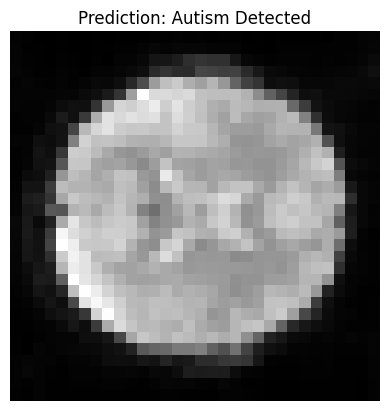

Model Prediction: 0.7624 -> Autism Detected


In [ ]:
import nibabel as nib
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("/content/drive/MyDrive/cnn_model.h5")

# Load the NIfTI file
nifti_file = "/content/drive/MyDrive/OHSU_0050147_func_minimal.nii"
nifti_img = nib.load(nifti_file)
image_data = nifti_img.get_fdata()

# Check the shape
print("NIfTI image shape:", image_data.shape)  # (61, 73, 61, 78)

# Select one timepoint (T=0)
image_data = image_data[..., 0]  # Now shape is (61, 73, 61)

# Pick a middle slice along Z-axis
z_index = image_data.shape[2] // 2
mid_slice = image_data[:, :, z_index]  # Shape (73, 61)

# Normalize the image (scale between 0 and 1)
mid_slice = (mid_slice - np.min(mid_slice)) / (np.max(mid_slice) - np.min(mid_slice))

# Resize to match CNN input (32x32)
resized_img = cv2.resize(mid_slice, (32, 32))

# Reshape for model input
input_image = resized_img.reshape(1, 32, 32, 1)

# Run the model for prediction
prediction = model.predict(input_image)

# Interpret the result
threshold = 0.5
result = "Autism Detected" if prediction[0][0] > threshold else "No Autism"

# Show the processed image
plt.imshow(resized_img, cmap="gray")
plt.title(f"Prediction: {result}")
plt.axis("off")
plt.show()

print(f"Model Prediction: {prediction[0][0]:.4f} -> {result}")


NIfTI image shape: (61, 73, 61, 78)

Processing Timepoint 0, Slice 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


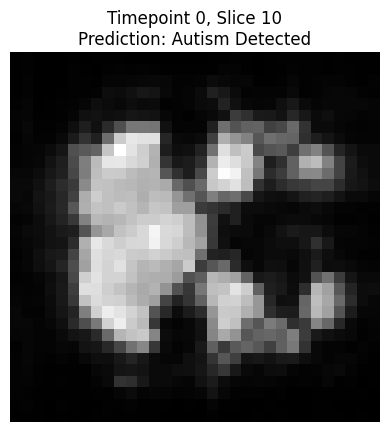

Model Prediction: 0.8833 -> Autism Detected

Processing Timepoint 0, Slice 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


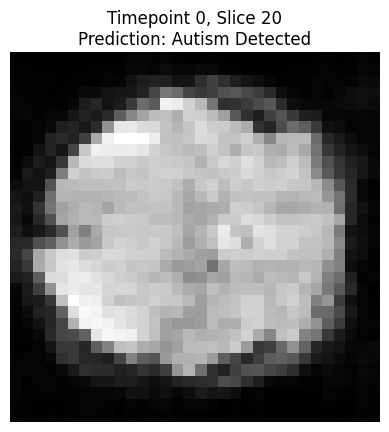

Model Prediction: 0.8294 -> Autism Detected

Processing Timepoint 0, Slice 30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


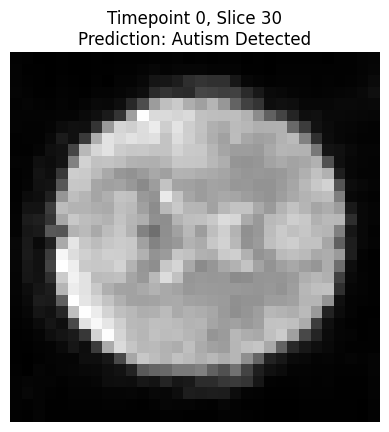

Model Prediction: 0.8122 -> Autism Detected

Processing Timepoint 0, Slice 40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


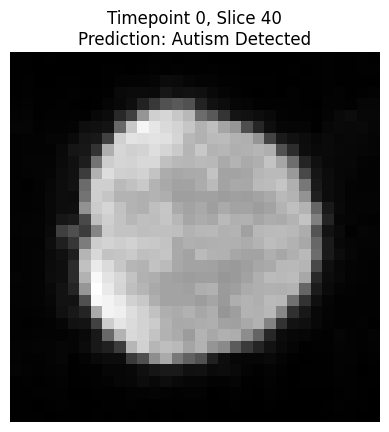

Model Prediction: 0.8447 -> Autism Detected

Processing Timepoint 1, Slice 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


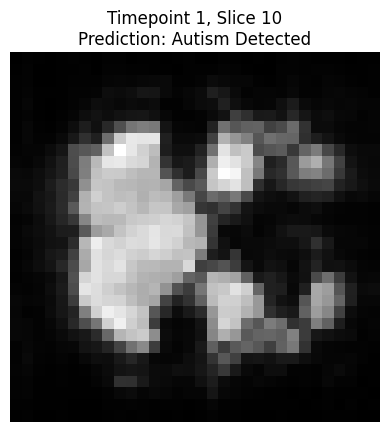

Model Prediction: 0.8781 -> Autism Detected

Processing Timepoint 1, Slice 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


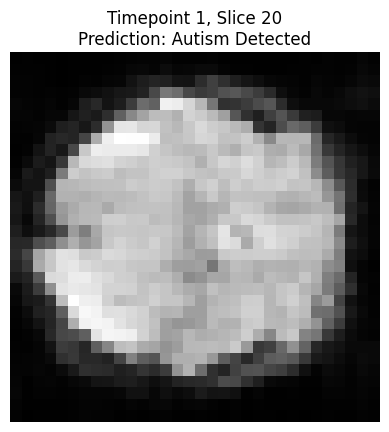

Model Prediction: 0.8278 -> Autism Detected

Processing Timepoint 1, Slice 30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


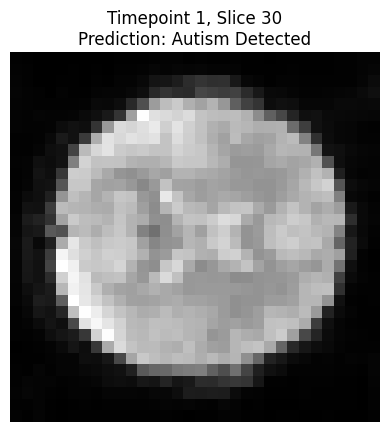

Model Prediction: 0.8111 -> Autism Detected

Processing Timepoint 1, Slice 40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


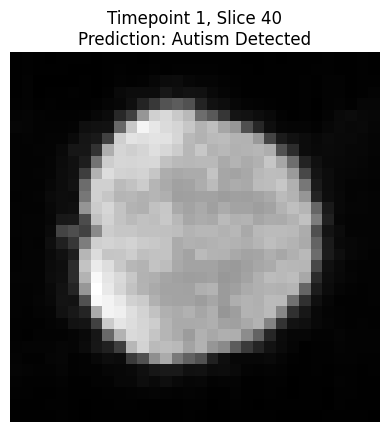

Model Prediction: 0.8452 -> Autism Detected

Processing Timepoint 2, Slice 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


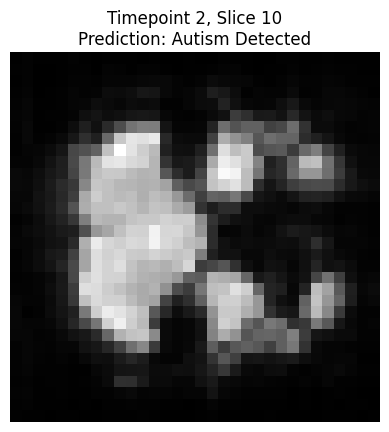

Model Prediction: 0.8749 -> Autism Detected

Processing Timepoint 2, Slice 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


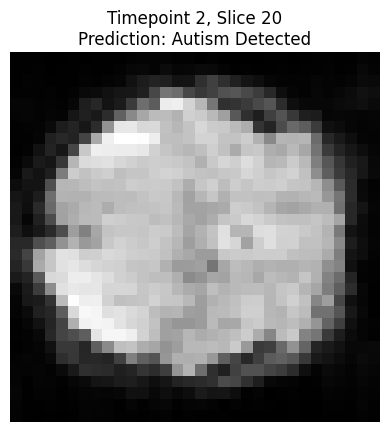

Model Prediction: 0.8316 -> Autism Detected

Processing Timepoint 2, Slice 30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


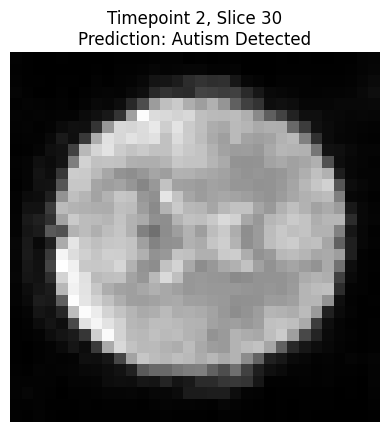

Model Prediction: 0.8125 -> Autism Detected

Processing Timepoint 2, Slice 40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


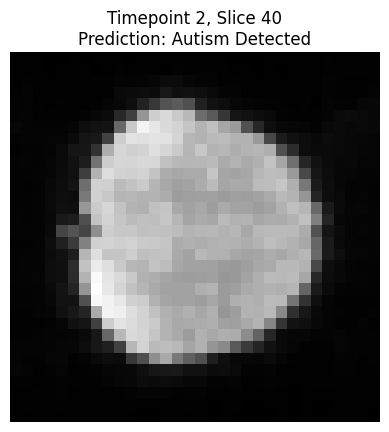

Model Prediction: 0.8443 -> Autism Detected

Processing Timepoint 3, Slice 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


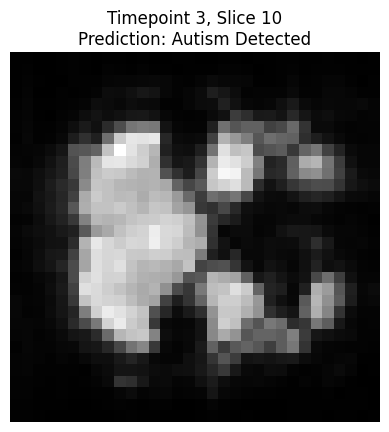

Model Prediction: 0.8801 -> Autism Detected

Processing Timepoint 3, Slice 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


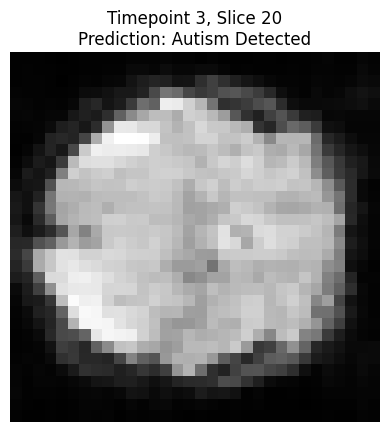

Model Prediction: 0.8313 -> Autism Detected

Processing Timepoint 3, Slice 30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


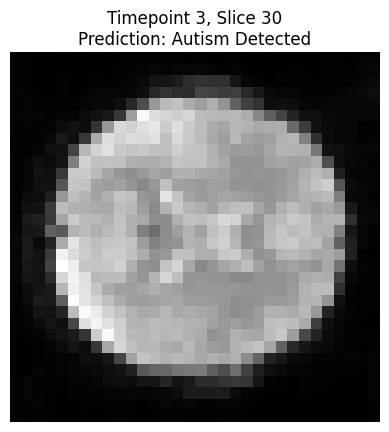

Model Prediction: 0.8104 -> Autism Detected

Processing Timepoint 3, Slice 40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


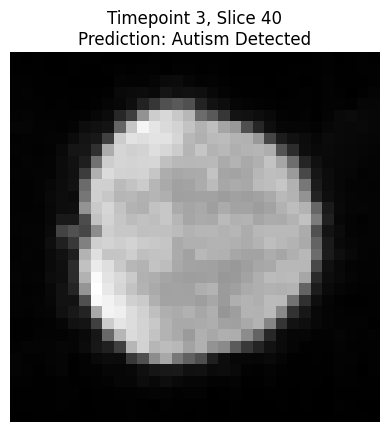

Model Prediction: 0.8423 -> Autism Detected

Processing Timepoint 4, Slice 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


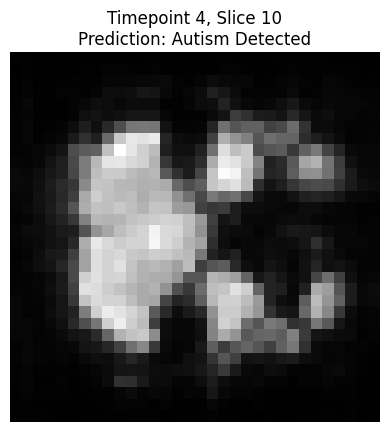

Model Prediction: 0.8712 -> Autism Detected

Processing Timepoint 4, Slice 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


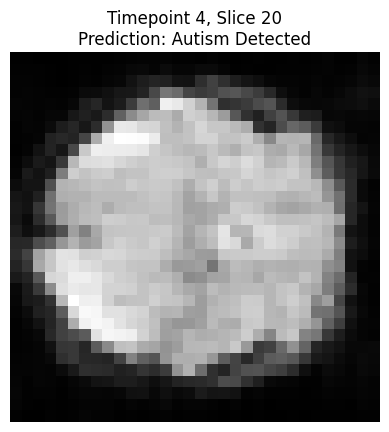

Model Prediction: 0.8314 -> Autism Detected

Processing Timepoint 4, Slice 30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


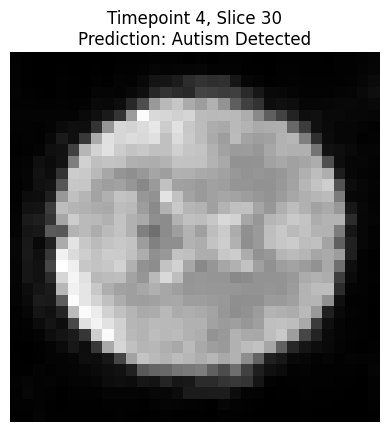

Model Prediction: 0.8069 -> Autism Detected

Processing Timepoint 4, Slice 40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


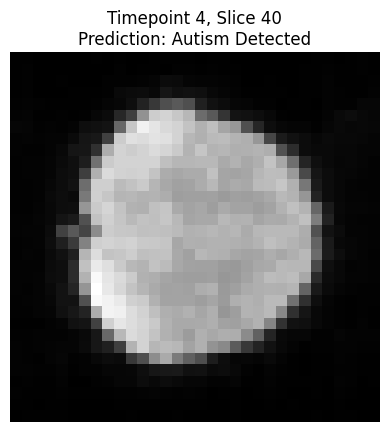

Model Prediction: 0.8417 -> Autism Detected


In [ ]:
import nibabel as nib
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("/content/drive/MyDrive/cnn_model.h5")

# Load the NIfTI file
nifti_file = "/content/drive/MyDrive/OHSU_0050147_func_minimal.nii"
nifti_img = nib.load(nifti_file)
image_data = nifti_img.get_fdata()

# Check the shape
print("NIfTI image shape:", image_data.shape)  # (61, 73, 61, 78)

# Loop through multiple timepoints and slices
for t in range(0, min(5, image_data.shape[3])):  # Try first 5 timepoints
    for z in range(10, 50, 10):  # Try slices 10, 20, 30, 40
        print(f"\nProcessing Timepoint {t}, Slice {z}")

        # Select timepoint
        time_slice = image_data[..., t]

        # Select a brain slice
        mid_slice = time_slice[:, :, z]

        # Normalize
        mid_slice = (mid_slice - np.min(mid_slice)) / (np.max(mid_slice) - np.min(mid_slice))

        # Resize to match CNN input (32x32)
        resized_img = cv2.resize(mid_slice, (32, 32))

        # Reshape for model input
        input_image = resized_img.reshape(1, 32, 32, 1)

        # Run prediction
        prediction = model.predict(input_image)
        result = "Autism Detected" if prediction[0][0] > 0.5 else "No Autism"

        # Show the image and result
        plt.imshow(resized_img, cmap="gray")
        plt.title(f"Timepoint {t}, Slice {z}\nPrediction: {result}")
        plt.axis("off")
        plt.show()

        print(f"Model Prediction: {prediction[0][0]:.4f} -> {result}")


**Different Type of Tests**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, f1_score, accuracy_score

# Load the dataset
file_path = "/content/drive/MyDrive/cleaned_autism_dataset.csv"
df = pd.read_csv(file_path)

# Define the target column
target_column = "DX_GROUP"

# Separate features & labels
X = df.drop(columns=[target_column])  # Features
y_true = df[target_column]  # Labels

# Ensure binary labels (0 and 1)
y_true = (y_true == 1).astype(int)  # Convert to binary if needed

# Normalize features (same scaling as training)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input (Assuming 32x32 image shape)
num_features = X_scaled.shape[1]
image_size = int(np.sqrt(num_features))

# Handle mismatches by padding/truncating
if image_size * image_size > num_features:
    padding_size = image_size**2 - num_features
    X_scaled = np.pad(X_scaled, ((0, 0), (0, padding_size)), mode='constant')
elif image_size * image_size < num_features:
    X_scaled = X_scaled[:, :image_size**2]

X_scaled = X_scaled.reshape(X_scaled.shape[0], image_size, image_size, 1)

# Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_true, test_size=0.2, random_state=42)


Model loaded successfully.
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step

Performance Metrics:
F1 Score: 0.9733
Accuracy: 0.9776
ROC-AUC Score: 0.9972
Precision-Recall AUC Score: 0.9969


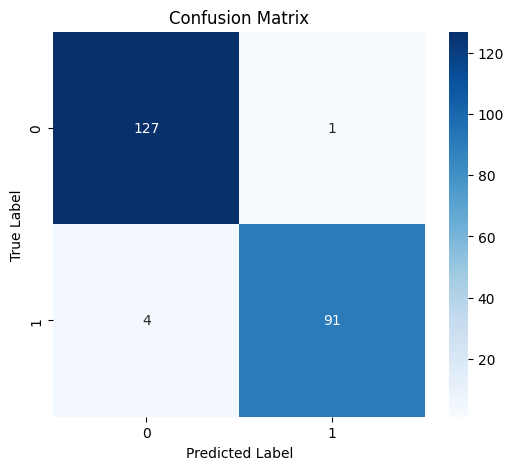

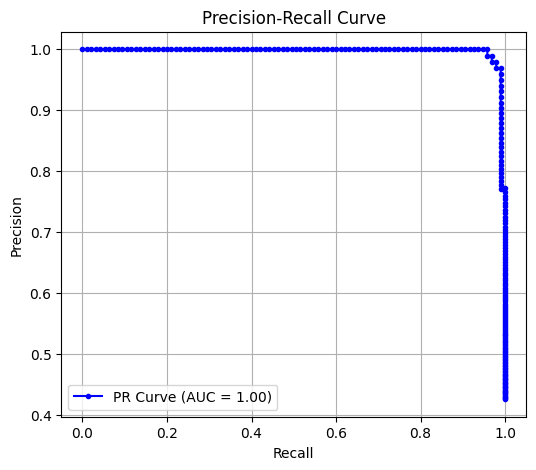

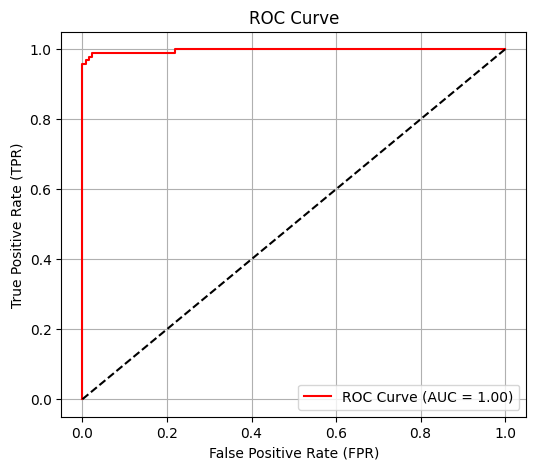

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import (
    confusion_matrix, classification_report, precision_recall_curve,
    roc_curve, auc, f1_score, accuracy_score, roc_auc_score
)

# --- Load the trained model if not already defined ---
model_path = "/content/drive/MyDrive/cnn_model.h5"  # Update with the correct path
try:
    model = load_model(model_path)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

# --- Ensure X_test has the correct shape and data type ---
X_test = np.array(X_test, dtype=np.float32)  # Convert to float if necessary
X_test = X_test.reshape((-1, 33, 33, 1))  # Ensure correct shape (update if needed)

# --- Predict probabilities & labels ---
y_probs = model.predict(X_test, verbose=1)  # Probability scores
y_pred = (y_probs > 0.5).astype(int)  # Convert to binary (0 or 1)

# --- Ensure y_test has the correct shape ---
y_test = np.array(y_test).flatten()  # Flatten in case it's multi-dimensional

# --- Compute performance metrics ---
conf_matrix = confusion_matrix(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_probs)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)  # ROC-AUC Score
pr_auc = auc(recall, precision)  # Precision-Recall AUC Score

print(f"\nPerformance Metrics:")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision-Recall AUC Score: {pr_auc:.4f}")

# --- Plot Confusion Matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# --- Plot Precision-Recall Curve ---
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, marker='.', color='b', label=f"PR Curve (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

# --- Plot ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='red', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='black')  # Diagonal line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [ ]:
y_probs = model.predict(X_test)  # Get probability scores
y_probs = y_probs.flatten()  # Convert to 1D array if needed

threshold = 0.5  # Classification threshold
y_pred = (y_probs >= threshold).astype(int)  # Convert probabilities to 0/1


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[127   1]
 [  4  91]]


**Precision, Recall, F1 Score, Sensitivity, and Specificity**

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       128
           1       0.99      0.96      0.97        95

    accuracy                           0.98       223
   macro avg       0.98      0.98      0.98       223
weighted avg       0.98      0.98      0.98       223

F1 Score: 0.9732620320855615
Accuracy Score: 0.9775784753363229


**Precision-Recall (PR) Curve**

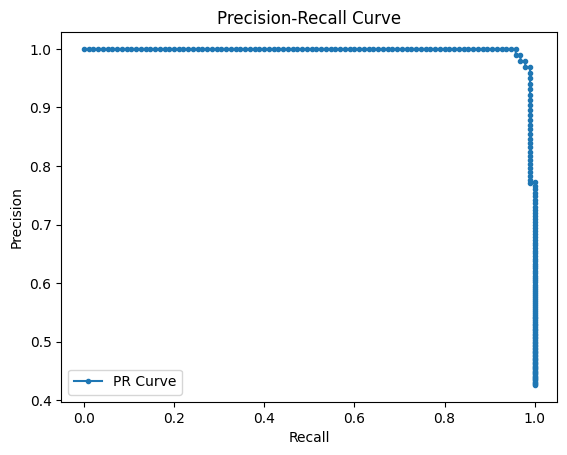

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.plot(recall, precision, marker='.', label='PR Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision-Recall Curve")
plt.show()
